# **Lung Cancer Prediction Model**

# **1. Data Preprocessing**

**1.1. Import Libraries**

In [9]:
# I have imported necessary libraries
import pandas as pd # open source library for data manipuation and analysis in python
import seaborn as sns # data visualization library
import numpy as np # this library is a fundemental package for scientific calculation
import matplotlib.pyplot as plt # this is a comprehensive library for creating statistics and attractive visualization
import xgboost as xgb #

from sklearn.preprocessing import StandardScaler #this one standardizes features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split # this one split arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score # this one used to Measures the accuracy of a classification model.
from sklearn.metrics import classification_report , confusion_matrix # this one Creates a matrix to evaluate classification performance
from sklearn.linear_model import LogisticRegression # this Implements logistic regression for binary classification
from sklearn.svm import SVC # this one is Support Vector Machines for classification tasks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Implements Support Vector Machines for classification
from sklearn.preprocessing import LabelEncoder # this one Encodes categorical labels as numeric values.
from sklearn.model_selection import GridSearchCV#to search for the best combination of hyperparameters.
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from collections import Counter



**1.2. Import Dataset**

In [10]:
# I have Loaded the dataset
file_path = '/content/Lung_Cancer_Dataset.csv'
LC_data = pd.read_csv(file_path)

# Ihave Displayed the first few rows of the dataset to understand its structure
LC_data.head(), LC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

(  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
 0      M   69        1               2        2              1   
 1      M   74        2               1        1              1   
 2      F   59        1               1        1              2   
 3      M   63        2               2        2              1   
 4      F   63        1               2        1              1   
 
    CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
 0                1         2         1         2                  2         2   
 1                2         2         2         1                  1         1   
 2                1         2         1         2                  1         2   
 3                1         1         1         1                  2         1   
 4                1         1         1         2                  1         2   
 
    SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
 0                    2      

**1.3. Create Dataframe df_LungCancer**

In [11]:
# I have created data frame called df_LugCancer
df_LungCancer = pd.DataFrame(LC_data)
# I have generate a descriptive statistics summary of my Data Frame
df_LungCancer.describe(include = "all")

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


**1.4. Checking Null Values**

In [12]:
# here I have identified and counted the number of missing values in each column of the DataFrame
df_LungCancer.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [13]:
# I have identified and counted the number of duplicate rows in a DataFrame
df_LungCancer.duplicated().sum()

33

**1.5. Data Encoding**

In [14]:
# Convert categorical columns to numeric
labelencoder = LabelEncoder()
df_LungCancer['GENDER'] = labelencoder.fit_transform(df_LungCancer['GENDER'])
df_LungCancer['LUNG_CANCER'] = labelencoder.fit_transform(df_LungCancer['LUNG_CANCER'])

# replace categorical values in the GENDER column to numerical values
df_LungCancer["GENDER"] = df_LungCancer["GENDER"].replace(["M" , "F"] , [0,1]).infer_objects()
df_LungCancer

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


**1.6 Data Distribution**

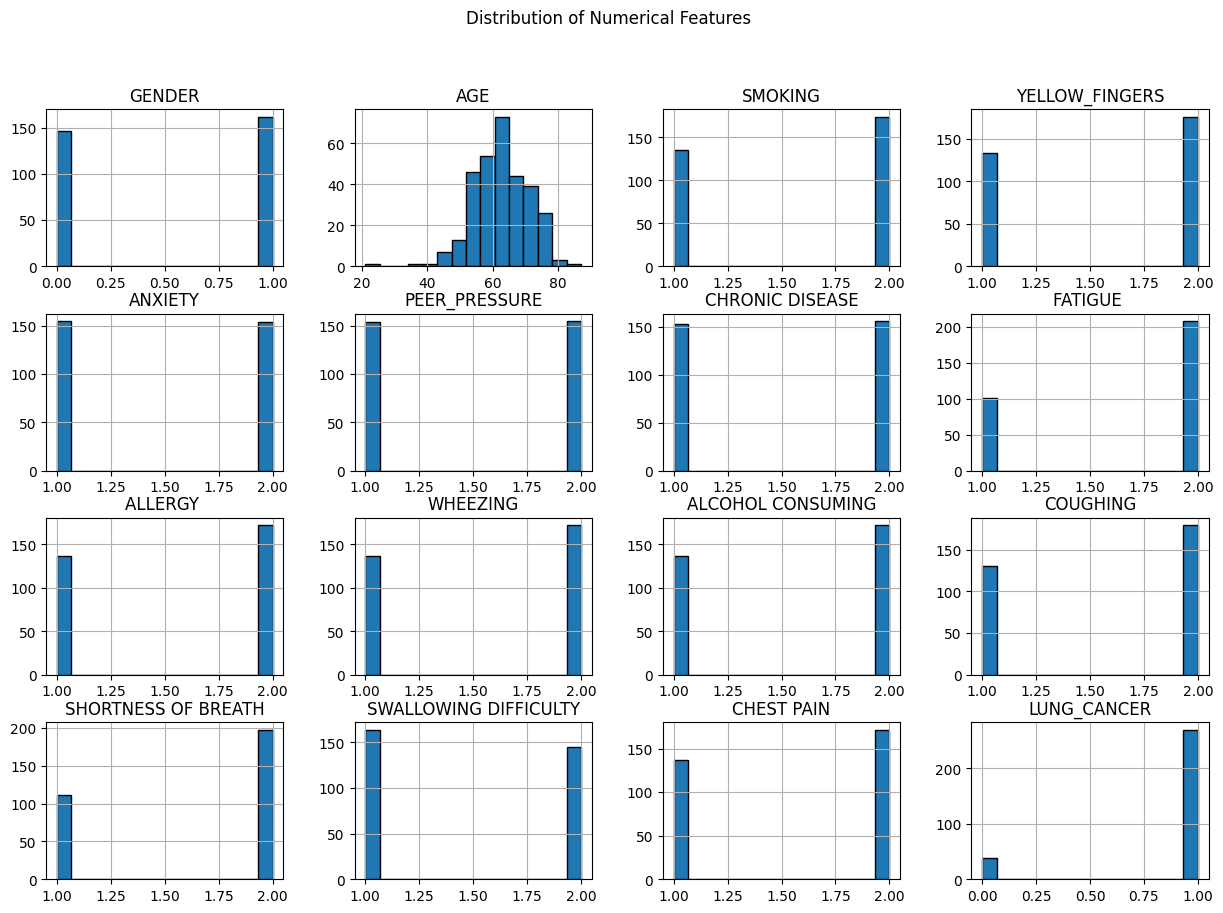

In [15]:
# Plotting the distribution of numerical features in the DataFrame 'df_LungCancer'
df_LungCancer.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Features')# Setting a title for the entire figure
plt.show()# Display the plot

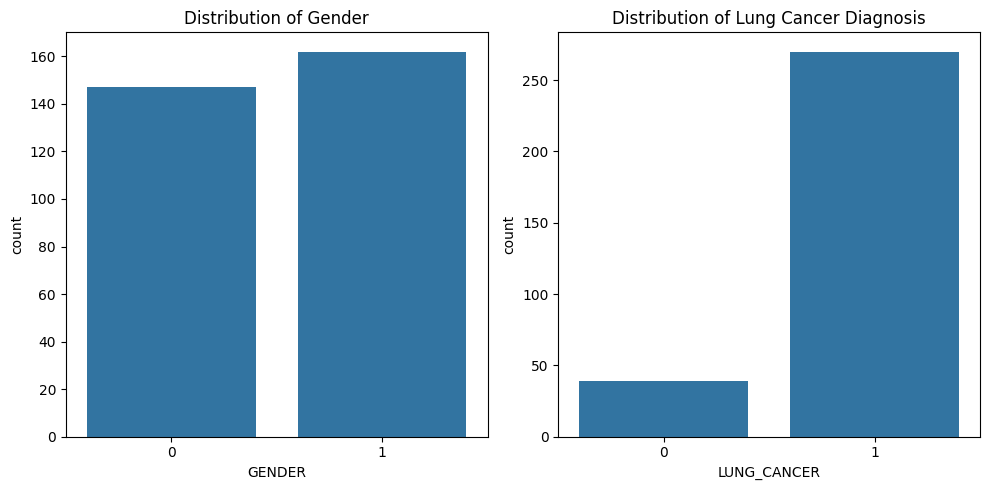

In [16]:
# Plotting the distribution of the 'GENDER' and 'LUNG_CANCER' columns
plt.figure(figsize=(10, 5))

# Count plot for Gender
plt.subplot(1, 2, 1) # Creating a subplot in a 1x2 grid, this is the first subplot
sns.countplot(x='GENDER', data=df_LungCancer) # Plotting the count of each gender in the 'GENDER' column
plt.title('Distribution of Gender') # Setting the title for the gender distribution plot

# Count plot for Lung Cancer Diagnosis
plt.subplot(1, 2, 2) # Creating the second subplot in the 1x2 grid
sns.countplot(x='LUNG_CANCER', data=df_LungCancer) # Plotting the count of each category in the 'LUNG_CANCER' column
plt.title('Distribution of Lung Cancer Diagnosis') # Setting the title for the lung cancer diagnosis distribution plot

plt.tight_layout() # Adjusting the layout to prevent overlap
plt.show() #Display the plot

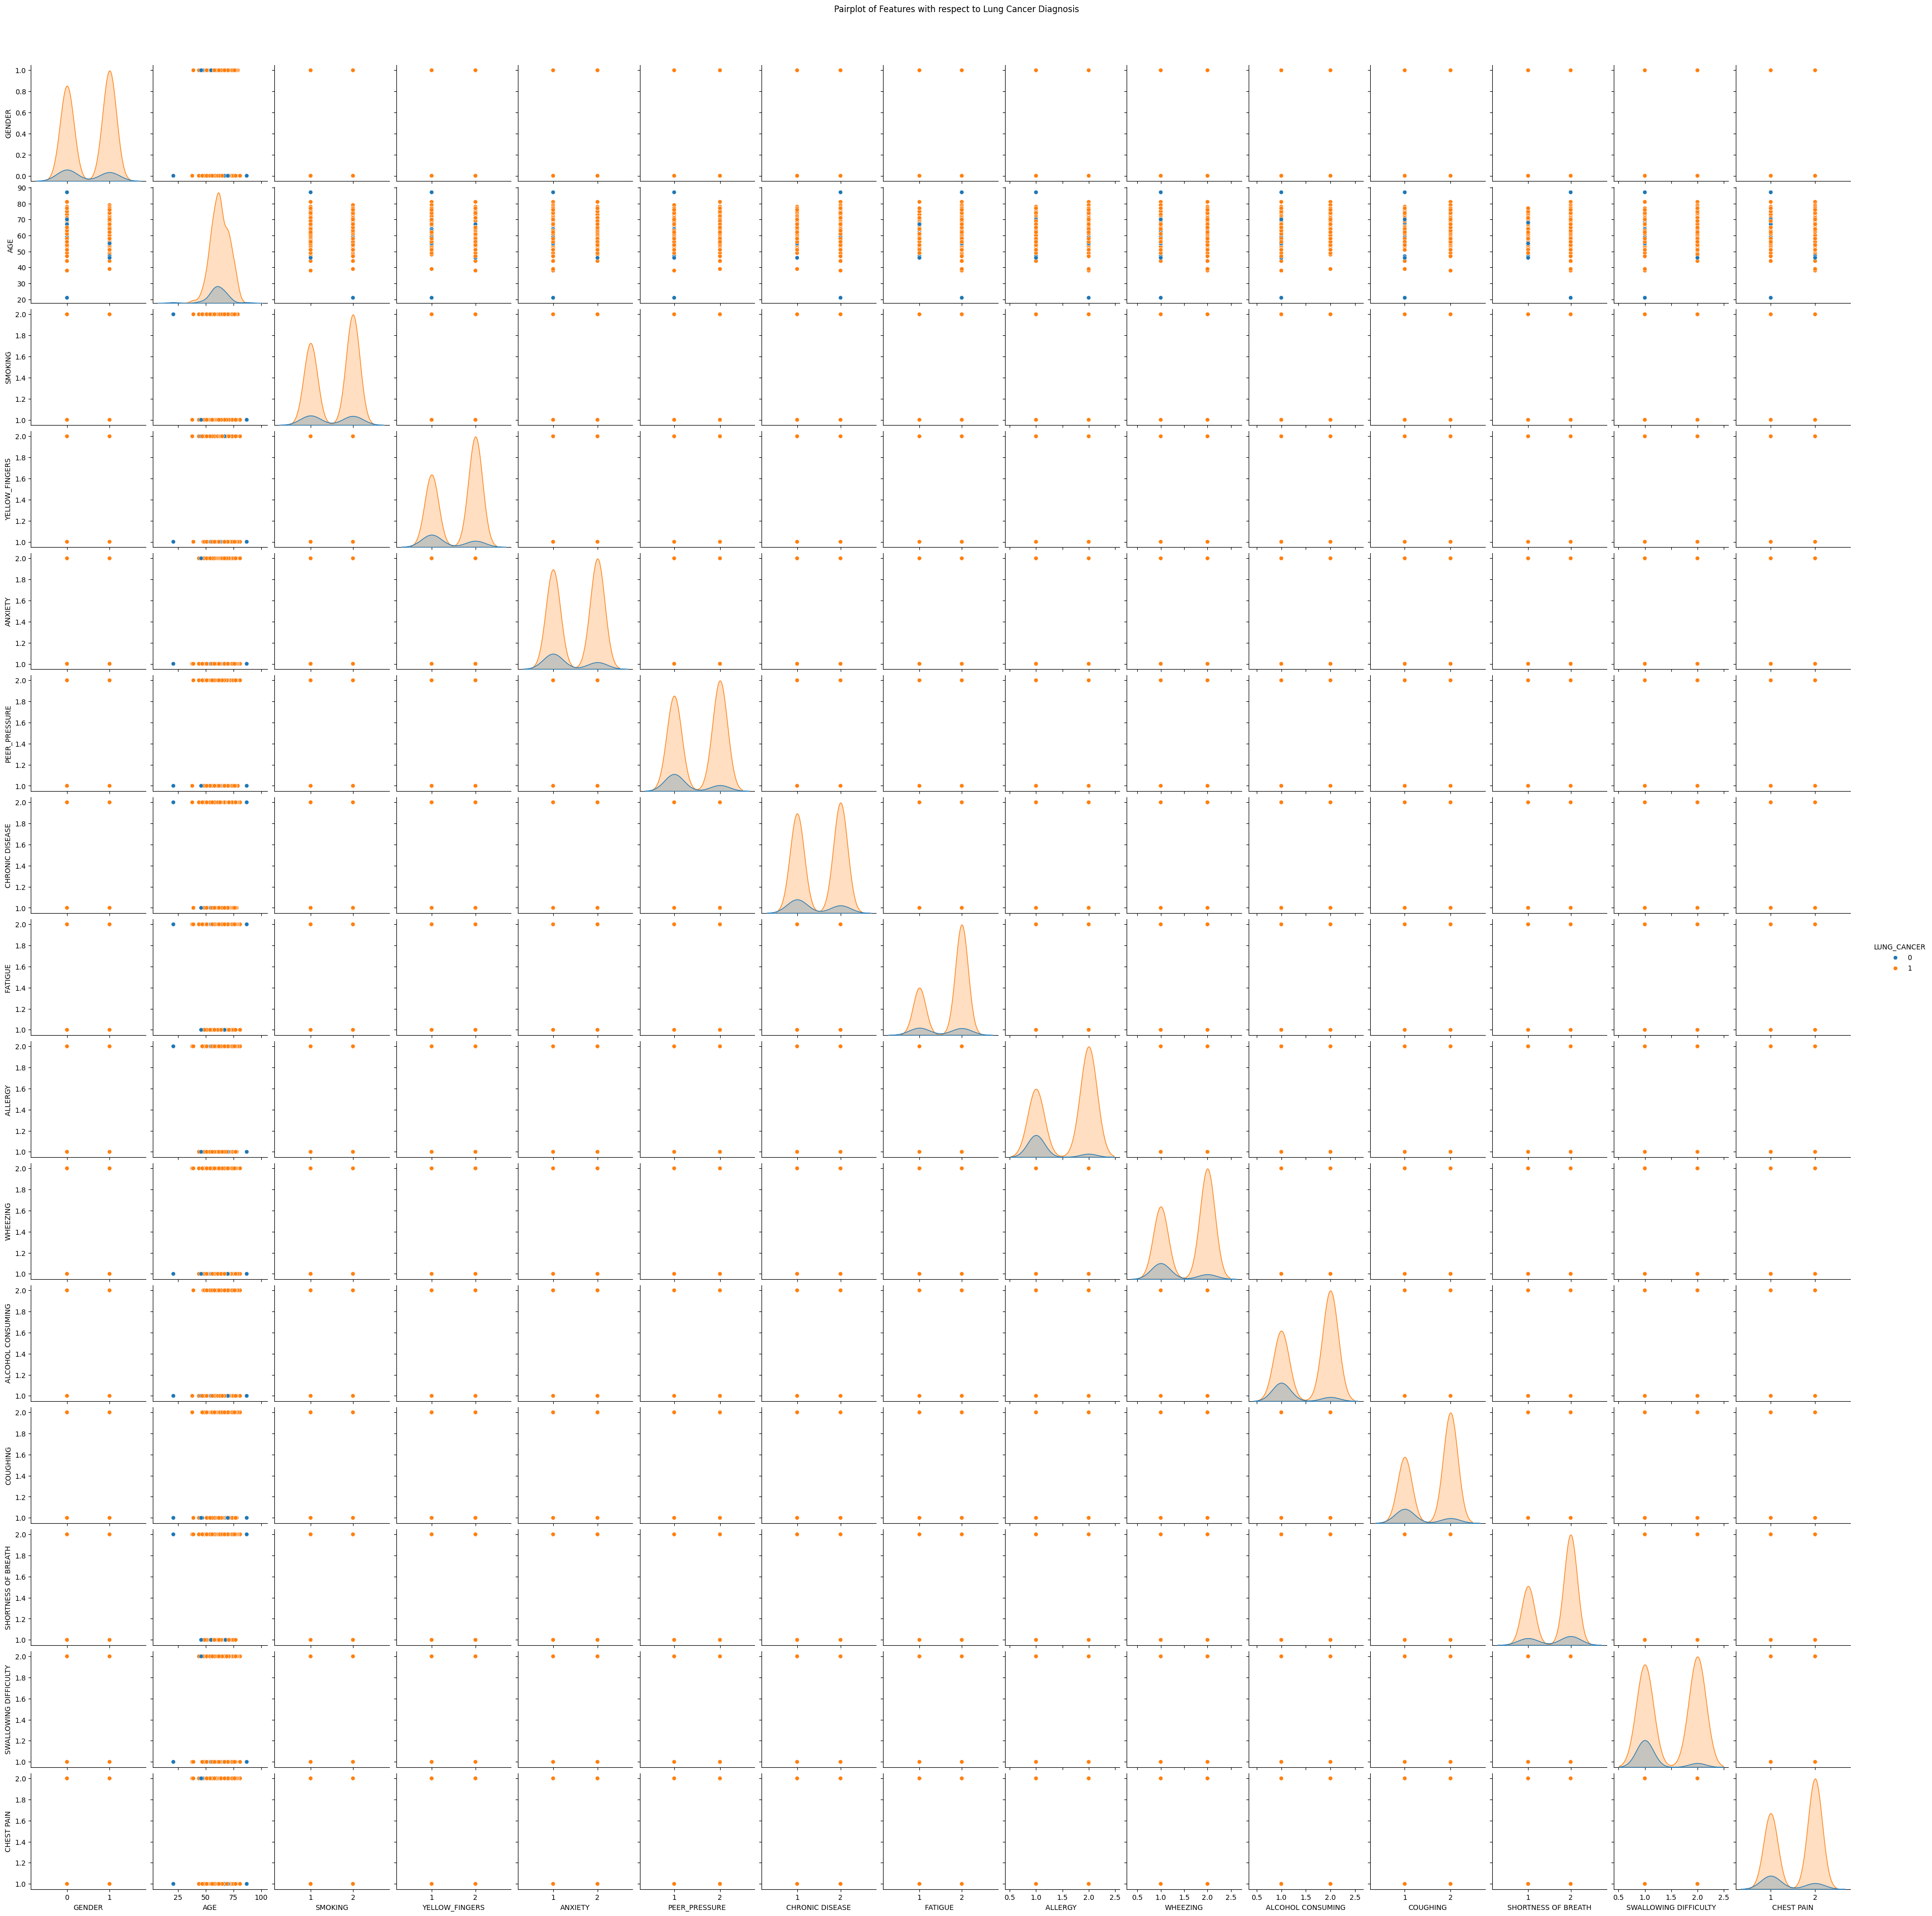

In [17]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df_LungCancer, hue='LUNG_CANCER') # The 'hue' parameter colors the plots according to the 'LUNG_CANCER' column, distinguishing the different classes
# Adding a title to the entire figure
# The 'y=1.02' parameter positions the title slightly above the plot for better visibility
plt.suptitle('Pairplot of Features with respect to Lung Cancer Diagnosis', y=1.02)
# Display the plpot
plt.show()

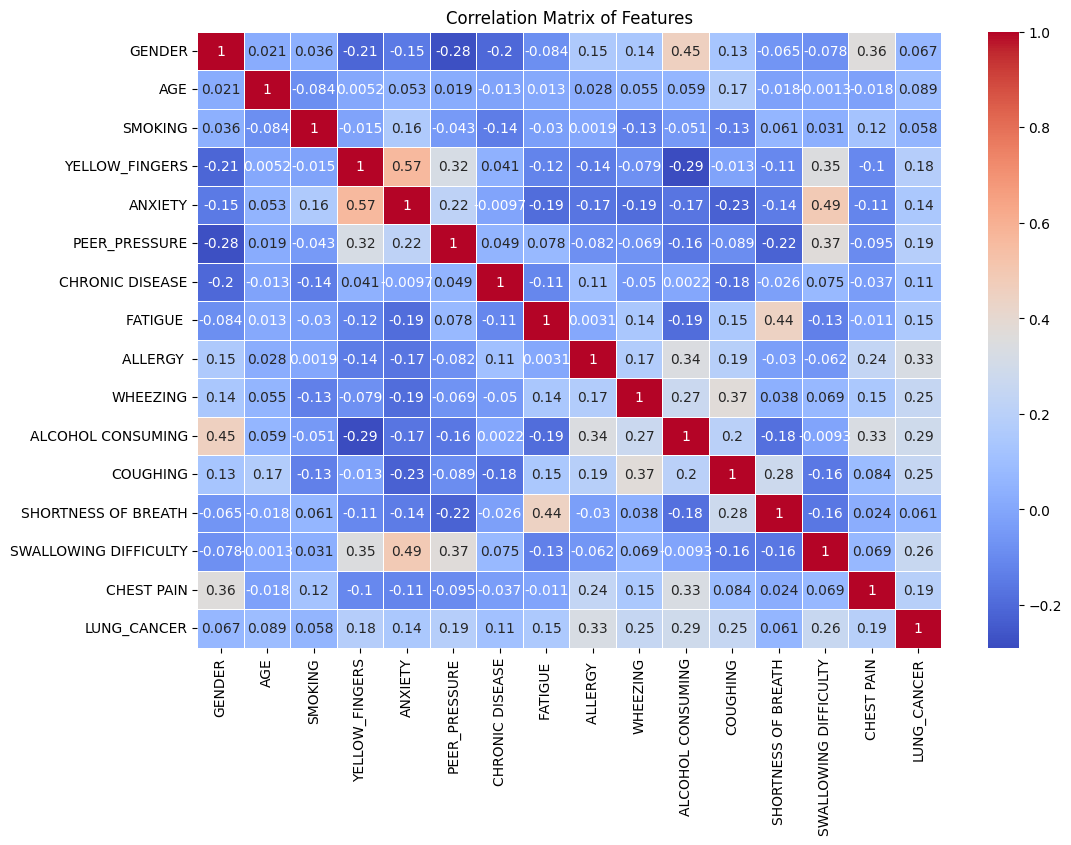

In [18]:
# Selecting only numeric columns from the DataFrame 'df_LungCancer'
# This is done to focus on the correlation between numeric features only
numeric_df = df_LungCancer.select_dtypes(include=[np.number])

# Heatmap to show correlation between features
# Setting up the figure size for the heatmap
plt.figure(figsize=(12, 8))
# Calculating the correlation matrix for the numeric features in the DataFrame
correlation_matrix = numeric_df.corr()
# Creating a heatmap to visualize the correlation matrix
# 'annot=True' displays the correlation coefficients on the heatmap
# 'cmap='coolwarm'' sets the color map to a range from cool to warm colors
# 'linewidths=0.5' adds lines between the cells of the heatmap for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# Adding a title to the heatmap
plt.title('Correlation Matrix of Features')
#Display the plot
plt.show()

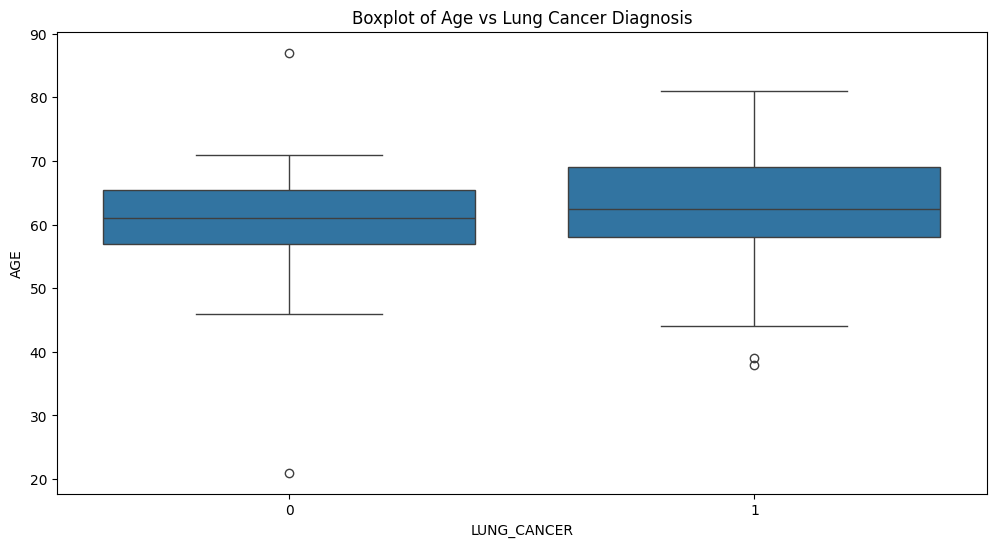

In [19]:
# Boxplot for a numerical feature against the target variable
plt.figure(figsize=(12, 6))
# Creating a boxplot to visualize the distribution of the 'AGE' feature across different classes of 'LUNG_CANCER'
# 'x='LUNG_CANCER'' specifies that the x-axis represents the lung cancer diagnosis categories (target variable)
# 'y='AGE'' specifies that the y-axis represents the numerical feature 'AGE'
# 'data=df_LungCancer' specifies that the data comes from the 'df_LungCancer' DataFrame
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df_LungCancer)
# Adding a title to the boxplot
plt.title('Boxplot of Age vs Lung Cancer Diagnosis')
#Display the plot
plt.show()

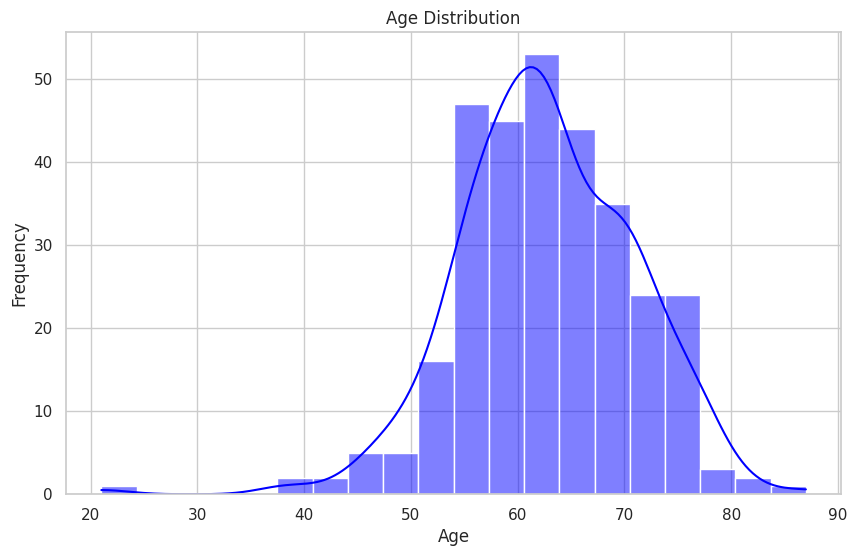

In [20]:
# Set the style for the plots to "whitegrid", which gives a clean background with gridlines
sns.set(style="whitegrid")

# Age Distribution
plt.figure(figsize=(10, 6)) # Initialize a figure with a size of 10x6 inches
# Create a histogram for the 'AGE' column in the df_LungCancer DataFrame
# 'bins=20' specifies that the histogram should have 20 bins
# 'kde=True' adds a Kernel Density Estimate (KDE) curve to the histogram to show the distribution's shape
# 'color='blue'' sets the color of the histogram bars to blue
sns.histplot(df_LungCancer['AGE'], bins=20, kde=True, color='blue')
# Adding a title to the histogram
plt.title('Age Distribution')
# Name x label as Age
plt.xlabel('Age')
#Name y label as Frequency
plt.ylabel('Frequency')
# Display the plot
plt.show()

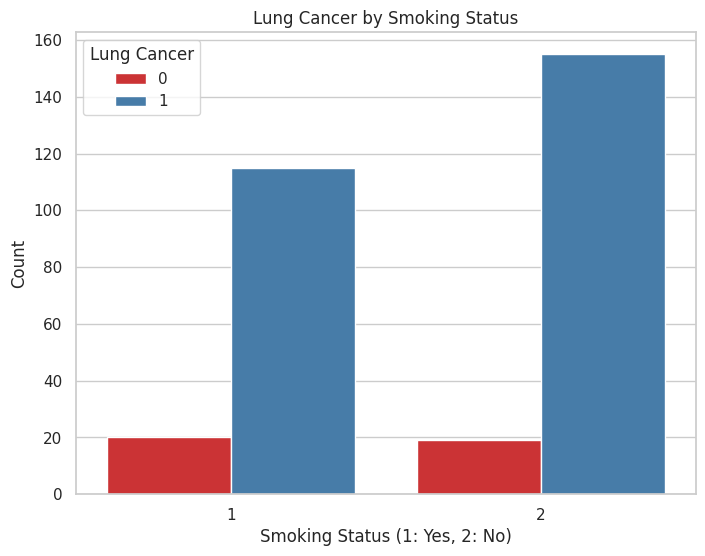

In [21]:
# Plot 3: Lung Cancer by Smoking Status
plt.figure(figsize=(8, 6))
# Create a count plot to visualize the relationship between smoking status and lung cancer diagnosis
# 'x='SMOKING'' sets the smoking status as the categorical variable on the x-axis
# 'hue='LUNG_CANCER'' colors the bars according to the lung cancer diagnosis, showing the distribution within each smoking status category
# 'data=df_LungCancer' specifies that the data for the plot comes from the 'df_LungCancer' DataFrame
# 'palette='Set1'' sets the color palette to 'Set1', which provides a set of distinct, vibrant colors
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df_LungCancer, palette='Set1')
# Adding a title to the count plot
plt.title('Lung Cancer by Smoking Status')
# Labeling the x-axis as 'Smoking Status (1: Yes, 2: No)'
plt.xlabel('Smoking Status (1: Yes, 2: No)')
# Labeling the y-axis as 'Count'
plt.ylabel('Count')
# Adding a legend to the plot with the title 'Lung Cancer'
plt.legend(title='Lung Cancer')
#Display the plot
plt.show()

**1.7. Split Data into Features and Target Variable**

In [22]:
X = df_LungCancer.drop(columns=['LUNG_CANCER'])  # Features (all columns except the target)
y = df_LungCancer['LUNG_CANCER']  # Target variable

**1.7. Devid Data into Train and Test**

In [23]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**1.8. Scaling all Data **

In [24]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming it
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

**1.9. Apply SMOTE to remove Data Imbalance**

In [25]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display the class distribution after applying SMOTE
print(f"Resampled class distribution: {Counter(y_train_smote)}")

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the SMOTE-resampled training data and transforming it
X_train_smote_scaled = scaler.fit_transform(X_train_smote)

# Transforming the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

Resampled class distribution: Counter({1: 216, 0: 216})


# **2.Model Training **

# **Logistic Regression**

Accuracy: 0.9032
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62

Confusion Matrix:
[[ 5  3]
 [ 3 51]]


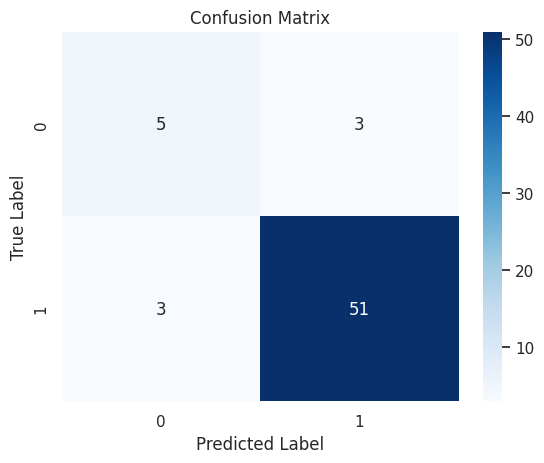

In [26]:
# Initialize the Logistic Regression model with a fixed random state for reproducibility.
logreg = LogisticRegression(random_state=42)

# Train the Logistic Regression model on the SMOTE-resampled and scaled training data
logreg.fit(X_train_smote_scaled, y_train_smote)

# Predict the labels for the test set using the trained model.
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model's performance by calculating the accuracy on the test set.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print a detailed classification report, including precision, recall, F1-score, and support for each class.
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix to visualize the correct and incorrect predictions made by the model.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# plot the confusion matrix for better visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

ROC AUC: 0.9537


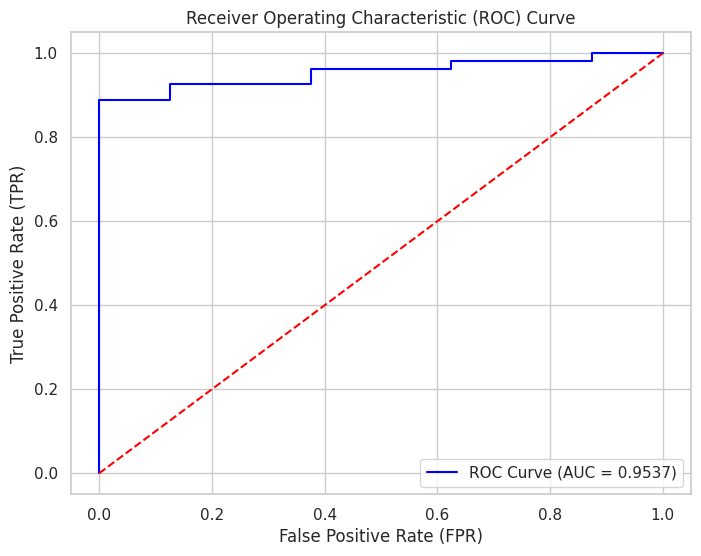

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict the probabilities for the test set using the trained Logistic Regression model.
# The predict_proba method returns probabilities for both classes; [:, 1] extracts the probabilities for the positive class.
y_probs = logreg.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class

# Compute the ROC curve values: False Positive Rate (FPR), True Positive Rate (TPR), and the thresholds used.
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the Area Under the ROC Curve (AUC) to summarize the model's performance.
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot the ROC curve to visualize the trade-off between the True Positive Rate and False Positive Rate.
plt.figure(figsize=(8, 6)) # Set the figure size for better visibility.
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})') # Plot the ROC curve with the AUC in the legend.
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Plot the diagonal reference line.
plt.title('Receiver Operating Characteristic (ROC) Curve') # Set the title of the plot.
plt.xlabel('False Positive Rate (FPR)') # Label the x-axis.
plt.ylabel('True Positive Rate (TPR)') # Label the y-axis.
plt.legend(loc='lower right')  # Position the legend in the lower right corner of the plot.
plt.show()# Display the plot.

# **Hyperparameter Tuning of Logistic Regression**

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to explore different hyperparameter combinations.
# Each dictionary in the list represents a combination of parameters to be tested:
# - 'C': Regularization strength (inverse of regularization); smaller values specify stronger regularization.
# - 'penalty': Specifies the norm used in the penalization ('l1', 'l2', 'elasticnet', or 'none').
# - 'solver': Algorithm to use in the optimization problem ('lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga').
# - 'l1_ratio': Used only with the 'elasticnet' penalty, balancing between l1 and l2 regularization.
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5]},  # l1_ratio is needed for elasticnet
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['none'], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}
]

# Initialize the Logistic Regression model with a high iteration limit to ensure convergence.
logreg = LogisticRegression(random_state=42, max_iter=10000)

# Initialize GridSearchCV to perform hyperparameter tuning using 5-fold cross-validation.
# - 'estimator': The model to tune (Logistic Regression in this case).
# - 'param_grid': The grid of parameters to search over.
# - 'cv': The number of cross-validation folds (5-fold in this case).
# - 'scoring': The metric to evaluate model performance ('accuracy' in this case).
# - 'n_jobs': The number of CPU cores to use (-1 uses all available cores).
# - 'verbose': Controls the verbosity; the higher, the more messages (1 gives basic progress information).
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the resampled and scaled training data.
# This will train the model for each combination of hyperparameters and evaluate it using cross-validation.
grid_search.fit(X_train_smote_scaled, y_train_smote)
grid_search.fit(X_train_smote_scaled, y_train_smote)

# Retrieve the best set of hyperparameters found by GridSearchCV.
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")


# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


ROC AUC: 0.9537


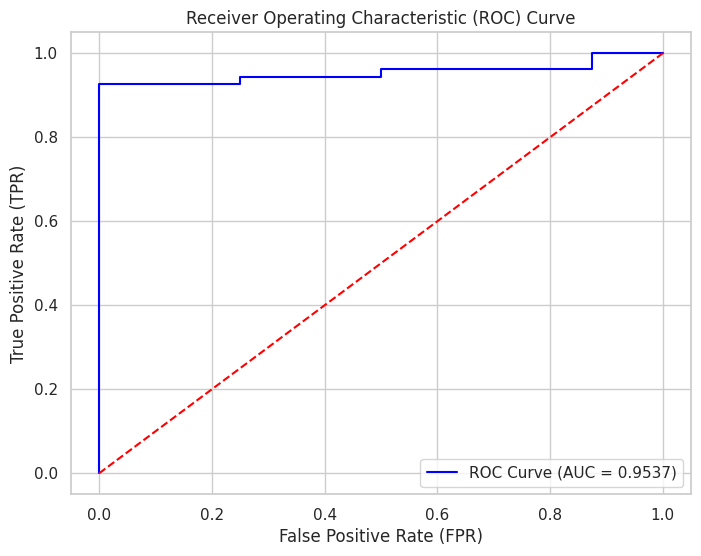

In [29]:
# Assign the best model (estimator) found by GridSearchCV to best_logreg.
# This model has the optimal combination of hyperparameters determined during the grid search.
best_logreg = grid_search.best_estimator_
# Predict the probabilities for the test set using the best Logistic Regression model.
# The predict_proba method returns an array with probabilities for both classes; [:, 1] extracts the probabilities for the positive class.
y_probs = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve values: False Positive Rate (FPR), True Positive Rate (TPR), and the decision thresholds used
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the Area Under the ROC Curve (AUC) to summarize the model's performance.
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot the ROC curve to visualize the trade-off between the True Positive Rate and False Positive Rate.
plt.figure(figsize=(8, 6)) # Set the figure size for better visibility.
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})') # Plot the ROC curve with the AUC in the legend.
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Plot the diagonal reference line, representing a random classifier.
plt.title('Receiver Operating Characteristic (ROC) Curve') # Set the title of the plot.
plt.xlabel('False Positive Rate (FPR)') # Label the x-axis.
plt.ylabel('True Positive Rate (TPR)') # Label the y-axis.
plt.legend(loc='lower right') # Position the legend in the lower right corner of the plot.
plt.show() # Display the plot

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.93      0.94      0.94        54

    accuracy                           0.89        62
   macro avg       0.75      0.72      0.73        62
weighted avg       0.88      0.89      0.88        62

Confusion Matrix:
[[ 4  4]
 [ 3 51]]


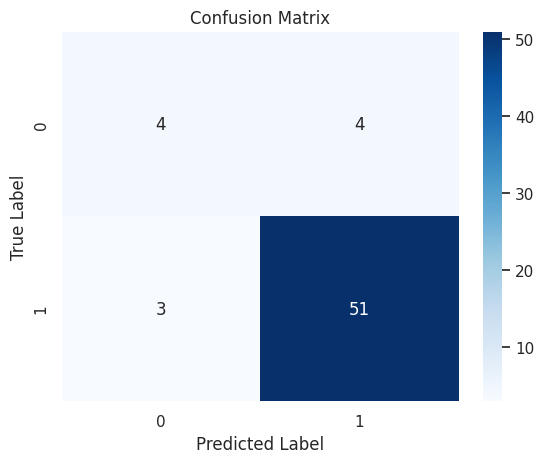

Accuracy: 0.8871
Precision: 0.9273
Recall: 0.9444
F1 Score: 0.9358


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predict the labels for the test set using the best Logistic Regression model found by GridSearchCV.
y_pred = best_logreg.predict(X_test_scaled)
# Generate a classification report to evaluate the model's performance.
# The classification report includes precision, recall, F1-score, and support for each class.
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix to visualize the model's performance.
# The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using a heatmap for better visualization.
# The annot=True argument adds the actual numbers on the heatmap cells.
# The fmt='d' argument ensures that the numbers are displayed as integers.
# The cmap='Blues' argument sets the color scheme of the heatmap to shades of blue.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')# Set the title of the plot.
plt.xlabel('Predicted Label')# Label the x-axis.
plt.ylabel('True Label')# Label the y-axis.
plt.show() # Display the plot

 #Calculate key performance metrics:
# - Accuracy: The proportion of correctly classified instances out of the total instances.
# - Precision: The proportion of true positive predictions out of all positive predictions made by the model.
# - Recall: The proportion of true positive predictions out of all actual positive instances.
# - F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the calculated metrics with four decimal points for precision.
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

                  Feature  Importance
8                ALLERGY     0.735230
6         CHRONIC DISEASE    0.691410
5           PEER_PRESSURE    0.684510
10      ALCOHOL CONSUMING    0.611362
7                FATIGUE     0.592480
3          YELLOW_FINGERS    0.515344
11               COUGHING    0.502134
9                WHEEZING    0.493048
13  SWALLOWING DIFFICULTY    0.473358
4                 ANXIETY    0.377961
14             CHEST PAIN    0.363222
2                 SMOKING    0.358778
12    SHORTNESS OF BREATH    0.184927
0                  GENDER    0.133161
1                     AGE    0.054408


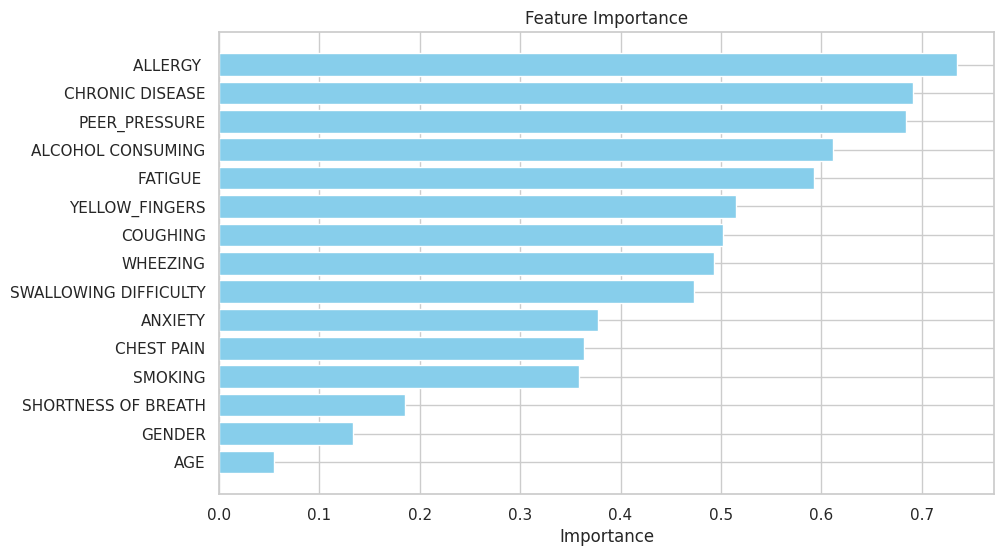

In [33]:
# Calculate the feature importance by taking the absolute value of the coefficients from the best Logistic Regression model.
# The coefficients represent the contribution of each feature to the decision boundary.
feature_importance = np.abs(best_logreg.coef_[0])  # Get the absolute value of coefficients

# Get the feature names from the DataFrame (assuming X is the original feature matrix before scaling).
feature_names = X.columns

# Create a DataFrame to organize and display the feature importance.
# This DataFrame will have two columns: 'Feature' for the feature names and 'Importance' for their corresponding importance values.
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by the 'Importance' column in descending order to rank features from most to least important.
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame to view the feature importance in a readable format.
print(importance_df)

# Plot the feature importance using a horizontal bar plot.
plt.figure(figsize=(10, 6))# Set the figure size for better visibility.
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')  # Plot the feature importance with a light blue color.
plt.xlabel('Importance')# Label the x-axis.
plt.title('Feature Importance')# Set the title of the plot.
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()# Display the plot

# **SVM (Support Vector Machine Model)**

Accuracy (Untuned SVM): 0.8710
Precision (Untuned SVM): 0.9259
Recall (Untuned SVM): 0.9259
F1 Score (Untuned SVM): 0.9259
ROC AUC (Untuned SVM): 0.9398
Classification Report (Untuned SVM):
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.93      0.93      0.93        54

    accuracy                           0.87        62
   macro avg       0.71      0.71      0.71        62
weighted avg       0.87      0.87      0.87        62

Confusion Matrix (Untuned SVM):
[[ 4  4]
 [ 4 50]]


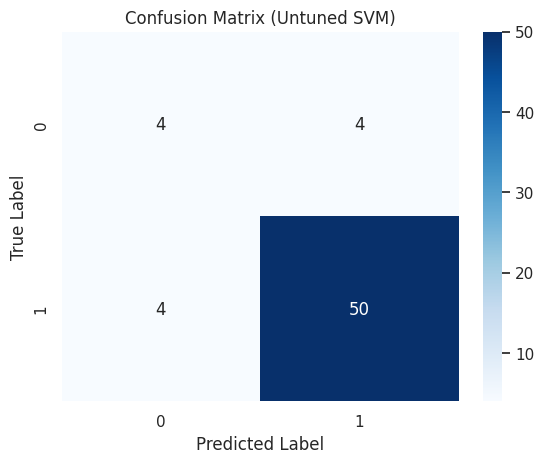

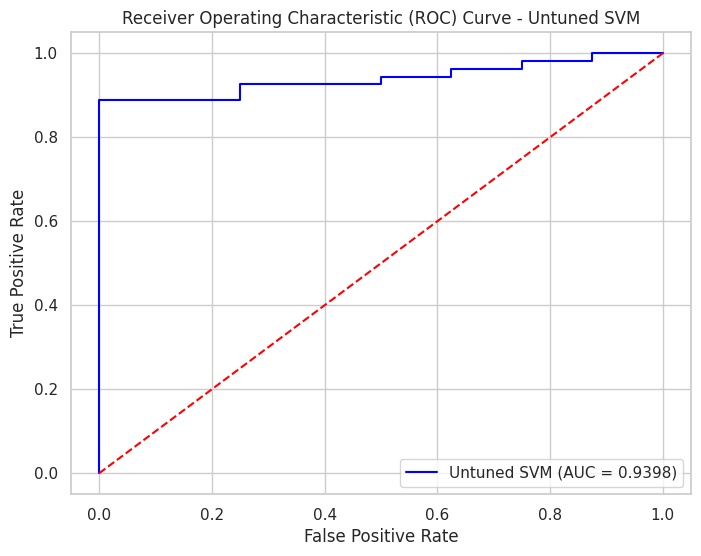

In [34]:
# Initialize the SVM (Support Vector Machine) model with default parameters.
# Setting probability=True allows the model to provide probability estimates, which is required for ROC AUC calculation.
untuned_svm = SVC(probability=True, random_state=42)

# Train the untuned SVM model on the SMOTE-resampled and scaled training data.
untuned_svm.fit(X_train_smote_scaled, y_train_smote)

# Predict the labels for the test set using the untuned SVM model.
y_pred_untuned_svm = untuned_svm.predict(X_test_scaled)

# Predict the probabilities for the test set, specifically for the positive class, using the untuned SVM model.
# These probabilities are necessary for calculating the ROC AUC.
y_probs_untuned_svm = untuned_svm.predict_proba(X_test_scaled)[:, 1]

# Calculate key performance metrics:
# - Accuracy: The proportion of correctly classified instances out of the total instances.
# - Precision: The proportion of true positive predictions out of all positive predictions made by the model.
# - Recall: The proportion of true positive predictions out of all actual positive instances.
# - F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
# - ROC AUC: The Area Under the ROC Curve, summarizing the model's ability to distinguish between classes.
accuracy_untuned_svm = accuracy_score(y_test, y_pred_untuned_svm)
precision_untuned_svm = precision_score(y_test, y_pred_untuned_svm)
recall_untuned_svm = recall_score(y_test, y_pred_untuned_svm)
f1_untuned_svm = f1_score(y_test, y_pred_untuned_svm)
roc_auc_untuned_svm = roc_auc_score(y_test, y_probs_untuned_svm)

# Display the calculated metrics with four decimal points for precision.
print(f"Accuracy (Untuned SVM): {accuracy_untuned_svm:.4f}")
print(f"Precision (Untuned SVM): {precision_untuned_svm:.4f}")
print(f"Recall (Untuned SVM): {recall_untuned_svm:.4f}")
print(f"F1 Score (Untuned SVM): {f1_untuned_svm:.4f}")
print(f"ROC AUC (Untuned SVM): {roc_auc_untuned_svm:.4f}")

# Generate and display a classification report for the untuned SVM model.
# The classification report includes precision, recall, F1-score, and support for each class.
print("Classification Report (Untuned SVM):")
print(classification_report(y_test, y_pred_untuned_svm))

# Generate and display the confusion matrix to visualize the untuned SVM model's performance.
# The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions.
conf_matrix_untuned_svm = confusion_matrix(y_test, y_pred_untuned_svm)
print("Confusion Matrix (Untuned SVM):")
print(conf_matrix_untuned_svm)

# Plot the confusion matrix using a heatmap for better visualization.
# The annot=True argument adds the actual numbers on the heatmap cells.
# The fmt='d' argument ensures that the numbers are displayed as integers.
# The cmap='Blues' argument sets the color scheme of the heatmap to shades of blue.
sns.heatmap(conf_matrix_untuned_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Untuned SVM)') # Set the title of the plot.
plt.xlabel('Predicted Label')# Label the x-axis.
plt.ylabel('True Label')# Label the x-axis.
plt.show()#Display

# Plot the ROC Curve for the Untuned SVM model to visualize the trade-off between True Positive Rate and False Positive Rate.
fpr_untuned_svm, tpr_untuned_svm, _ = roc_curve(y_test, y_probs_untuned_svm)
plt.figure(figsize=(8, 6))# Set the figure size for better visibility.
plt.plot(fpr_untuned_svm, tpr_untuned_svm, color='blue', label=f'Untuned SVM (AUC = {roc_auc_untuned_svm:.4f})')# Plot the ROC curve with the AUC in the legend.
plt.plot([0, 1], [0, 1], color='red', linestyle='--')# Plot the diagonal reference line, representing a random classifier.
plt.title('Receiver Operating Characteristic (ROC) Curve - Untuned SVM')# Set the title of the plot.
plt.xlabel('False Positive Rate')# Label the x-axis.
plt.ylabel('True Positive Rate')# Label the y-axis.
plt.legend(loc='lower right')# Position the legend in the lower right corner of the plot.
plt.show()#Display the plot


In [35]:
# Define the parameter grid for hyperparameter tuning of the SVM model.
# - 'C': Regularization parameter; controls the trade-off between achieving a low error on the training data and minimizing model complexity.
# - 'kernel': Specifies the kernel type to be used in the algorithm (e.g., 'linear', 'rbf', 'poly', 'sigmoid').
# - 'gamma': Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. 'scale' is the default and is based on the number of features, while 'auto' uses 1/n_features.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM (Support Vector Machine) model with probability estimation enabled.
# Setting probability=True allows the model to provide probability estimates, which is required for certain metrics like ROC AUC.
svm = SVC(probability=True, random_state=42)

# Initialize GridSearchCV to perform hyperparameter tuning using 5-fold cross-validation.
# - 'estimator': The model to tune (SVM in this case).
# - 'param_grid': The grid of parameters to search over.
# - 'cv': The number of cross-validation folds (5-fold in this case).
# - 'scoring': The metric to evaluate model performance ('accuracy' in this case).
# - 'n_jobs': The number of CPU cores to use (-1 uses all available cores).
# - 'verbose': Controls the verbosity; the higher, the more messages (1 gives basic progress information).
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the resampled and scaled training data.
# This will train the model for each combination of hyperparameters and evaluate it using cross-validation to find the best set of parameters.
grid_search_svm.fit(X_train_smote_scaled, y_train_smote)

# Retrieve the best set of hyperparameters found by GridSearchCV.
# These parameters will be used to initialize a new SVM model or to understand which settings gave the best performance.
best_params_svm = grid_search_svm.best_params_
print(f"Best hyperparameters for SVM: {best_params_svm}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


Accuracy (SVM): 0.9194
Precision (SVM): 0.9455
Recall (SVM): 0.9630
F1 Score (SVM): 0.9541
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.95      0.96      0.95        54

    accuracy                           0.92        62
   macro avg       0.83      0.79      0.81        62
weighted avg       0.92      0.92      0.92        62

Confusion Matrix (SVM):
[[ 5  3]
 [ 2 52]]


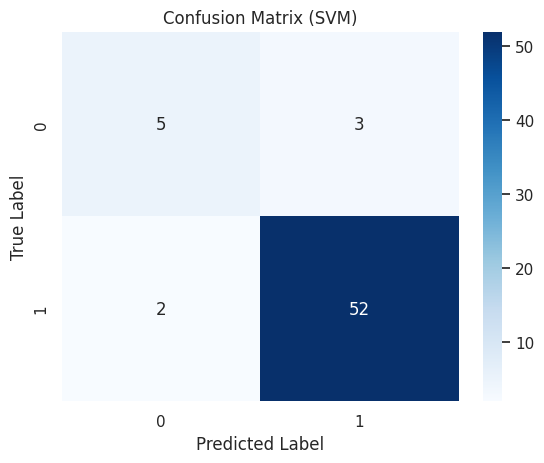

In [36]:
# Train the best SVM model using the best hyperparameters found by GridSearchCV.
# The best_estimator_ attribute gives the model with the optimal combination of hyperparameters.
best_svm = grid_search_svm.best_estimator_

# Fit the best SVM model on the resampled and scaled training data.
best_svm.fit(X_train_smote_scaled, y_train_smote)

# Predict the labels for the test set using the trained SVM model.
y_pred_svm = best_svm.predict(X_test_scaled)

# Calculate key performance metrics:
# - Accuracy: The proportion of correctly classified instances out of the total instances.
# - Precision: The proportion of true positive predictions out of all positive predictions made by the model.
# - Recall: The proportion of true positive predictions out of all actual positive instances.
# - F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Display the calculated metrics with four decimal points for precision.
print(f"Accuracy (SVM): {accuracy_svm:.4f}")
print(f"Precision (SVM): {precision_svm:.4f}")
print(f"Recall (SVM): {recall_svm:.4f}")
print(f"F1 Score (SVM): {f1_svm:.4f}")

# Generate and display a classification report for the SVM model.
# The classification report includes precision, recall, F1-score, and support for each class.
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

# Generate and display the confusion matrix to visualize the SVM model's performance.
# The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions.
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Plot the confusion matrix using a heatmap for better visualization.
# The annot=True argument adds the actual numbers on the heatmap cells.
# The fmt='d' argument ensures that the numbers are displayed as integers.
# The cmap='Blues' argument sets the color scheme of the heatmap to shades of blue.
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (SVM)')# Set the title of the plot.
plt.xlabel('Predicted Label')# x label
plt.ylabel('True Label')# y label
plt.show()#display

ROC AUC (SVM): 0.9491


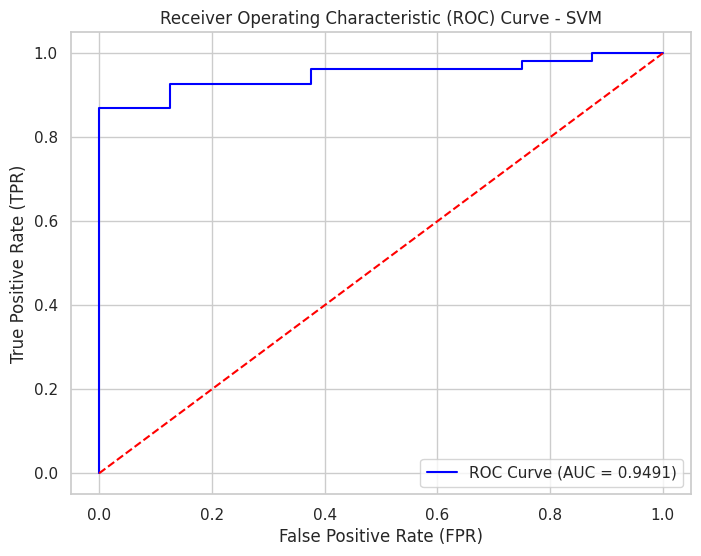

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict the probabilities for the test set using the best SVM model.
# The predict_proba method returns an array with probabilities for both classes; [:, 1] extracts the probabilities for the positive class.
y_probs_svm = best_svm.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class

# Compute the ROC curve values: False Positive Rate (FPR), True Positive Rate (TPR), and the decision thresholds used.
# The ROC curve is used to evaluate the performance of the classifier by plotting the TPR against the FPR at various threshold settings.
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_probs_svm)

# Calculate the Area Under the ROC Curve (AUC) to summarize the model's performance.
# A higher AUC value indicates a better model performance in distinguishing between the positive and negative classes.
roc_auc_svm = roc_auc_score(y_test, y_probs_svm)
print(f"ROC AUC (SVM): {roc_auc_svm:.4f}")

# Plot the ROC curve to visualize the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) for the SVM model.
plt.figure(figsize=(8, 6)) # Set the figure size for better visibility.
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {roc_auc_svm:.4f})')# Plot the ROC curve with the AUC in the legend.
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Plot the diagonal reference line, representing a random classifier.
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')# Set the title of the plot.
plt.xlabel('False Positive Rate (FPR)')# Label the x-axis.
plt.ylabel('True Positive Rate (TPR)')# Label the y-axis.
plt.legend(loc='lower right')# Position the legend in the lower right corner of the plot.
plt.show()#Display

                  Feature  Importance
7                FATIGUE     0.813172
6         CHRONIC DISEASE    0.771156
5           PEER_PRESSURE    0.573548
13  SWALLOWING DIFFICULTY    0.565262
11               COUGHING    0.536734
8                ALLERGY     0.511032
10      ALCOHOL CONSUMING    0.508045
2                 SMOKING    0.456092
9                WHEEZING    0.358313
3          YELLOW_FINGERS    0.355065
14             CHEST PAIN    0.260302
12    SHORTNESS OF BREATH    0.183973
4                 ANXIETY    0.164997
0                  GENDER    0.005188
1                     AGE    0.000034


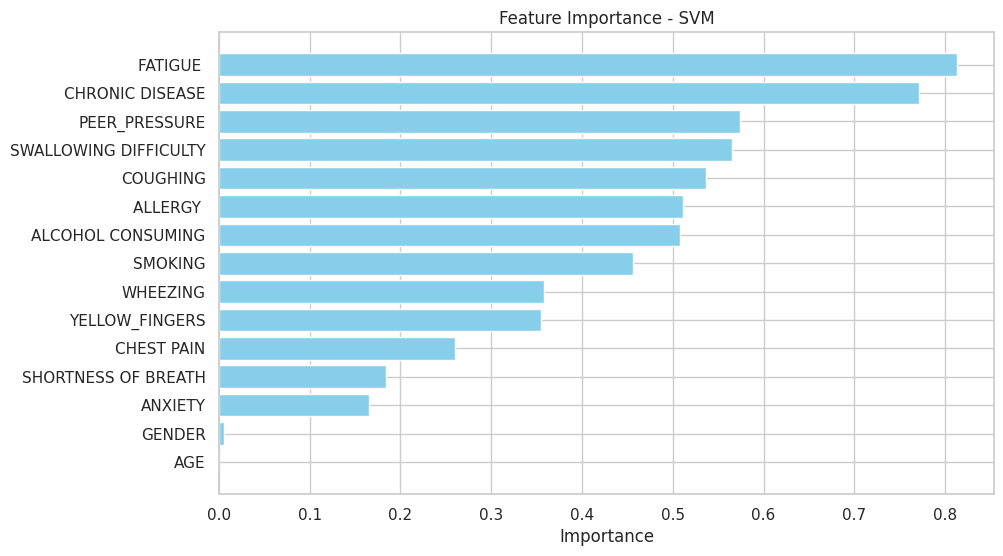

In [38]:
# Check if the best SVM model uses a linear kernel.
# Feature importance based on model coefficients is only applicable to linear SVM models.
if 'linear' in best_svm.kernel:
    feature_importance_svm = np.abs(best_svm.coef_[0])  # Get the absolute value of coefficients

    # Calculate the feature importance by taking the absolute value of the coefficients from the linear SVM model.
    # The coefficients represent the contribution of each feature to the decision boundary.
    feature_names = X.columns

     # Create a DataFrame to organize and display the feature importance.
    # This DataFrame will have two columns: 'Feature' for the feature names and 'Importance' for their corresponding importance values.
    importance_df_svm = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance_svm
    })


    # Sort the DataFrame by the 'Importance' column in descending order to rank features from most to least important
    importance_df_svm = importance_df_svm.sort_values(by='Importance', ascending=False)

    # Display the sorted DataFrame to view the feature importance in a readable format.
    print(importance_df_svm)

    # Plot the feature importance using a horizontal bar plot.
    plt.figure(figsize=(10, 6))# Set the figure size for better visibility.
    plt.barh(importance_df_svm['Feature'], importance_df_svm['Importance'], color='skyblue')# Plot the feature importance with a light blue color.
    plt.xlabel('Importance')# Label the x-axis.
    plt.title('Feature Importance - SVM') # Set the title of the plot.
    plt.gca().invert_yaxis()   # Invert the y-axis to display the most important feature at the top.
    plt.show()#Display
    # If the SVM model uses a non-linear kernel (e.g., 'rbf', 'poly', 'sigmoid'), feature importance cannot be calculated directly from coefficients.
else:
    print("Feature importance is not available for non-linear SVM kernels.")

# **Decision Tree Model**

Accuracy (Untuned Decision Tree): 0.8871
Precision (Untuned Decision Tree): 0.9608
Recall (Untuned Decision Tree): 0.9074
F1 Score (Untuned Decision Tree): 0.9333
ROC AUC (Untuned Decision Tree): 0.8287
Classification Report (Untuned Decision Tree):
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.96      0.91      0.93        54

    accuracy                           0.89        62
   macro avg       0.75      0.83      0.78        62
weighted avg       0.91      0.89      0.89        62

Confusion Matrix (Untuned Decision Tree):
[[ 6  2]
 [ 5 49]]


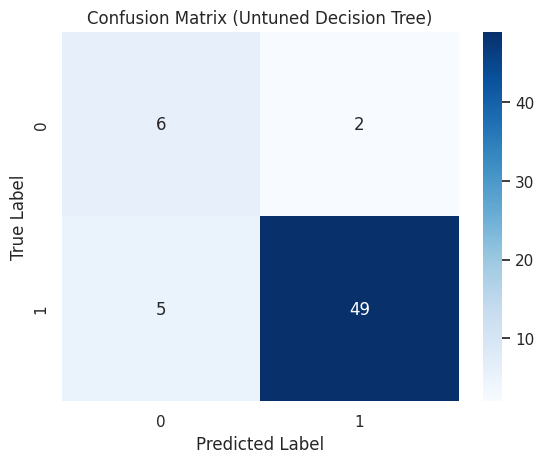

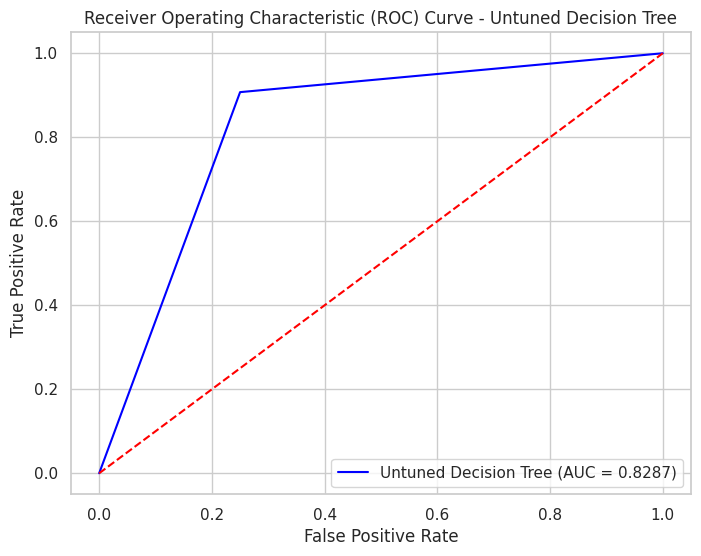

In [39]:
# Initialize the Decision Tree model with default parameters.
# The random_state is set to 42 for reproducibility, ensuring consistent results each time the code is run.
untuned_dt = DecisionTreeClassifier(random_state=42)

# Train the untuned Decision Tree model on the SMOTE-resampled and scaled training data.
untuned_dt.fit(X_train_smote_scaled, y_train_smote)

# Predict the labels for the test set using the trained untuned Decision Tree model.
y_pred_untuned_dt = untuned_dt.predict(X_test_scaled)

# Predict the probabilities for the test set, specifically for the positive class, using the untuned Decision Tree model.
# These probabilities are necessary for calculating the ROC AUC.
y_probs_untuned_dt = untuned_dt.predict_proba(X_test_scaled)[:, 1]

# Calculate key performance metrics:
# - Accuracy: The proportion of correctly classified instances out of the total instances.
# - Precision: The proportion of true positive predictions out of all positive predictions made by the model.
# - Recall: The proportion of true positive predictions out of all actual positive instances.
# - F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
# - ROC AUC: The Area Under the ROC Curve, summarizing the model's ability to distinguish between classes.
accuracy_untuned_dt = accuracy_score(y_test, y_pred_untuned_dt)
precision_untuned_dt = precision_score(y_test, y_pred_untuned_dt)
recall_untuned_dt = recall_score(y_test, y_pred_untuned_dt)
f1_untuned_dt = f1_score(y_test, y_pred_untuned_dt)
roc_auc_untuned_dt = roc_auc_score(y_test, y_probs_untuned_dt)

# Display the calculated metrics with four decimal points for precision.
print(f"Accuracy (Untuned Decision Tree): {accuracy_untuned_dt:.4f}")
print(f"Precision (Untuned Decision Tree): {precision_untuned_dt:.4f}")
print(f"Recall (Untuned Decision Tree): {recall_untuned_dt:.4f}")
print(f"F1 Score (Untuned Decision Tree): {f1_untuned_dt:.4f}")
print(f"ROC AUC (Untuned Decision Tree): {roc_auc_untuned_dt:.4f}")

# Generate and display a classification report for the untuned Decision Tree model.
# The classification report includes precision, recall, F1-score, and support for each class.
print("Classification Report (Untuned Decision Tree):")
print(classification_report(y_test, y_pred_untuned_dt))

# Generate and display the confusion matrix to visualize the untuned Decision Tree model's performance.
# The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions.
conf_matrix_untuned_dt = confusion_matrix(y_test, y_pred_untuned_dt)
print("Confusion Matrix (Untuned Decision Tree):")
print(conf_matrix_untuned_dt)

# Plot the confusion matrix using a heatmap for better visualization.
# The annot=True argument adds the actual numbers on the heatmap cells.
# The fmt='d' argument ensures that the numbers are displayed as integers.
# The cmap='Blues' argument sets the color scheme of the heatmap to shades of blue.x
sns.heatmap(conf_matrix_untuned_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Untuned Decision Tree)') # Set the title of the plot.
plt.xlabel('Predicted Label')# Label the x-axis.
plt.ylabel('True Label')# Label the y-axis.
plt.show()#Display

# Plot the ROC Curve for the Untuned Decision Tree model to visualize the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR).
fpr_untuned_dt, tpr_untuned_dt, _ = roc_curve(y_test, y_probs_untuned_dt)
plt.figure(figsize=(8, 6))# Set the figure size for better visibility.
plt.plot(fpr_untuned_dt, tpr_untuned_dt, color='blue', label=f'Untuned Decision Tree (AUC = {roc_auc_untuned_dt:.4f})')# Plot the ROC curve with the AUC in the legend.
plt.plot([0, 1], [0, 1], color='red', linestyle='--')# Plot the diagonal reference line, representing a random classifier.
plt.title('Receiver Operating Characteristic (ROC) Curve - Untuned Decision Tree')# Set the title of the plot.
plt.xlabel('False Positive Rate')# Label the x-axis.
plt.ylabel('True Positive Rate')# Label the y-axis.
plt.legend(loc='lower right')#Display
plt.show()

In [40]:
# Define the parameter grid for hyperparameter tuning of the Decision Tree model.
# The grid includes a variety of options for the key hyperparameters:
# - 'criterion': The function to measure the quality of a split ('gini', 'entropy', or 'log_loss').
# - 'splitter': The strategy used to choose the split at each node ('best' or 'random').
# - 'max_depth': The maximum depth of the tree (None means the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples).
# - 'min_samples_split': The minimum number of samples required to split an internal node.
# - 'min_samples_leaf': The minimum number of samples required to be at a leaf node.
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Decision Tree model with a fixed random state for reproducibility.
decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV to perform hyperparameter tuning using 5-fold cross-validation.
# - 'estimator': The model to tune (Decision Tree in this case).
# - 'param_grid': The grid of parameters to search over.
# - 'cv': The number of cross-validation folds (5-fold in this case).
# - 'scoring': The metric to evaluate model performance ('accuracy' in this case).
# - 'n_jobs': The number of CPU cores to use (-1 uses all available cores).
# - 'verbose': Controls the verbosity; the higher the number, the more detailed the output (1 provides basic progress information).
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the resampled and scaled training data.
# This process will train the model for each combination of hyperparameters and evaluate it using cross-validation to find the best set of parameters.
grid_search_dt.fit(X_train_smote_scaled, y_train_smote)

# Retrieve the best set of hyperparameters found by GridSearchCV.
# These hyperparameters can be used to initialize a new Decision Tree model or to understand which settings gave the best performance.
best_params_dt = grid_search_dt.best_params_
print(f"Best hyperparameters for Decision Tree: {best_params_dt}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


Accuracy (Decision Tree): 0.8387
Precision (Decision Tree): 0.9231
Recall (Decision Tree): 0.8889
F1 Score (Decision Tree): 0.9057
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.92      0.89      0.91        54

    accuracy                           0.84        62
   macro avg       0.66      0.69      0.68        62
weighted avg       0.86      0.84      0.85        62

Confusion Matrix (Decision Tree):
[[ 4  4]
 [ 6 48]]


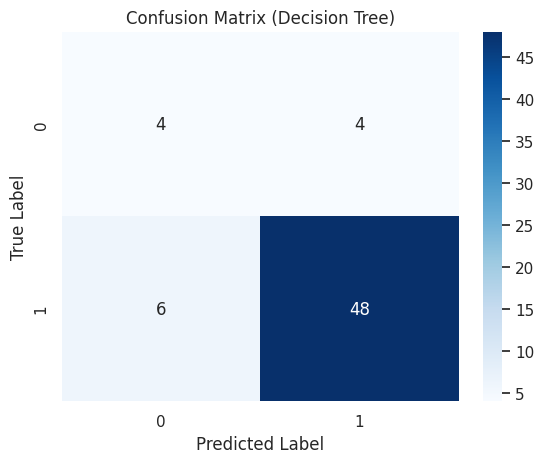

In [41]:
# Train the best Decision Tree model using the best hyperparameters found by GridSearchCV.
# The best_estimator_ attribute gives the model with the optimal combination of hyperparameters.
best_dt = grid_search_dt.best_estimator_

# Fit the best Decision Tree model on the resampled and scaled training data.
best_dt.fit(X_train_smote_scaled, y_train_smote)

# Predict the labels for the test set using the trained Decision Tree model.
y_pred_dt = best_dt.predict(X_test_scaled)

# Calculate key performance metrics:
# - Accuracy: The proportion of correctly classified instances out of the total instances.
# - Precision: The proportion of true positive predictions out of all positive predictions made by the model.
# - Recall: The proportion of true positive predictions out of all actual positive instances.
# - F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)


# Display the calculated metrics with four decimal points for precision.
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")
print(f"Precision (Decision Tree): {precision_dt:.4f}")
print(f"Recall (Decision Tree): {recall_dt:.4f}")
print(f"F1 Score (Decision Tree): {f1_dt:.4f}")

# Generate and display a classification report for the Decision Tree model.
# The classification report includes precision, recall, F1-score, and support for each class.
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Generate and display the confusion matrix to visualize the Decision Tree model's performance.
# The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions.
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Plot the confusion matrix using a heatmap for better visualization.
# The annot=True argument adds the actual numbers on the heatmap cells.
# The fmt='d' argument ensures that the numbers are displayed as integers.
# The cmap='Blues' argument sets the color scheme of the heatmap to shades of blue.
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Decision Tree)')# Set the title of the plot.
plt.xlabel('Predicted Label')# Label the x-axis.
plt.ylabel('True Label')# Label the y -axis.
plt.show()#Display

ROC AUC (Decision Tree): 0.9144


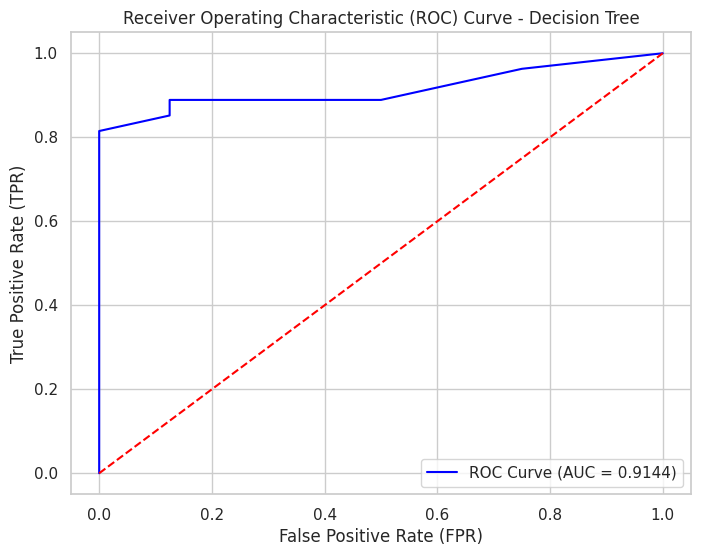

In [42]:
# Predict the probabilities for the test set using the best Decision Tree model.
# The predict_proba method returns an array with probabilities for both classes; [:, 1] extracts the probabilities for the positive class.
y_probs_dt = best_dt.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class

# Compute the ROC curve values: False Positive Rate (FPR), True Positive Rate (TPR), and the decision thresholds used.
# The ROC curve is used to evaluate the performance of the classifier by plotting the TPR against the FPR at various threshold settings.
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)

# Calculate the Area Under the ROC Curve (AUC) to summarize the model's performance.
# A higher AUC value indicates better model performance in distinguishing between the positive and negative classes.
roc_auc_dt = roc_auc_score(y_test, y_probs_dt)
print(f"ROC AUC (Decision Tree): {roc_auc_dt:.4f}")

# Plot the ROC curve to visualize the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) for the Decision Tree model.
plt.figure(figsize=(8, 6)) # Set the figure size for better visibility.
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'ROC Curve (AUC = {roc_auc_dt:.4f})') # Plot the ROC curve with the AUC in the legend.
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Plot the diagonal reference line, representing a random classifier.
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree') # Set the title of the plot.
plt.xlabel('False Positive Rate (FPR)') # Label the x-axis.
plt.ylabel('True Positive Rate (TPR)') # Label the y-axis.
plt.legend(loc='lower right')# Position the legend in the lower right corner of the plot.
plt.show()#Display

                  Feature  Importance
8                ALLERGY     0.508606
5           PEER_PRESSURE    0.243375
10      ALCOHOL CONSUMING    0.129257
9                WHEEZING    0.035272
3          YELLOW_FINGERS    0.025926
2                 SMOKING    0.024205
14             CHEST PAIN    0.013779
6         CHRONIC DISEASE    0.006052
13  SWALLOWING DIFFICULTY    0.004882
4                 ANXIETY    0.004226
7                FATIGUE     0.002892
1                     AGE    0.001218
0                  GENDER    0.000310
11               COUGHING    0.000000
12    SHORTNESS OF BREATH    0.000000


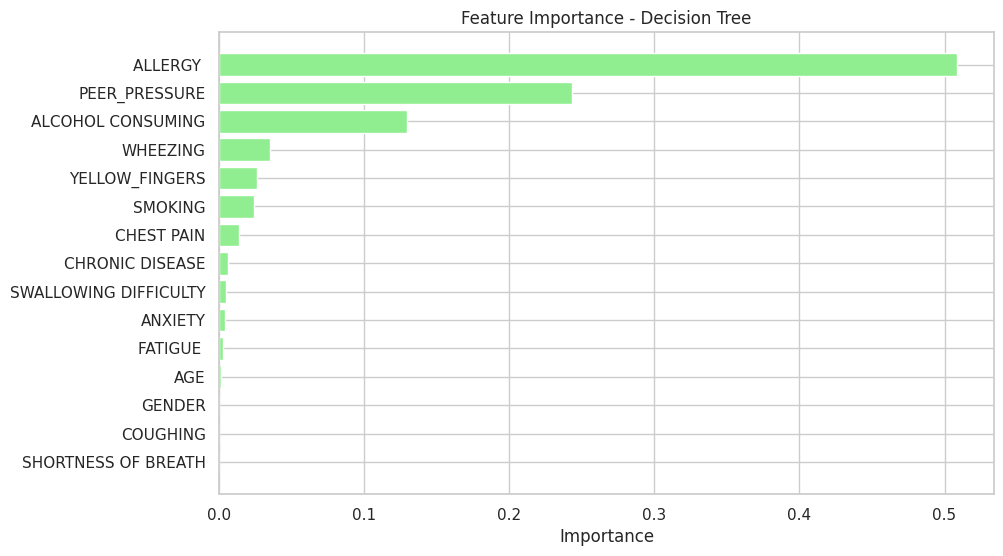

In [43]:
# Extract the feature importance values from the trained Decision Tree model.
# The feature_importances_ attribute gives the importance of each feature, indicating how much each feature contributes to the decision-making process.
feature_importance_dt = best_dt.feature_importances_

# Get the feature names from the original DataFrame (assuming X is the original feature matrix before scaling).
feature_names = X.columns

# Create a DataFrame to organize and display the feature importance.
# This DataFrame will have two columns: 'Feature' for the feature names and 'Importance' for their corresponding importance values.
importance_df_dt = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_dt
})

# Sort the DataFrame by the 'Importance' column in descending order to rank features from most to least important.
importance_df_dt = importance_df_dt.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame to view the feature importance in a readable format.
print(importance_df_dt)

# Plot the feature importance using a horizontal bar plot.
# This visualization helps in understanding which features are most influential in the model's decision-making process.
plt.figure(figsize=(10, 6))# Set the figure size for better visibility.
plt.barh(importance_df_dt['Feature'], importance_df_dt['Importance'], color='lightgreen')# Plot the feature importance with a light green color.
plt.xlabel('Importance')# Label the x-axis.
plt.title('Feature Importance - Decision Tree')# Title
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

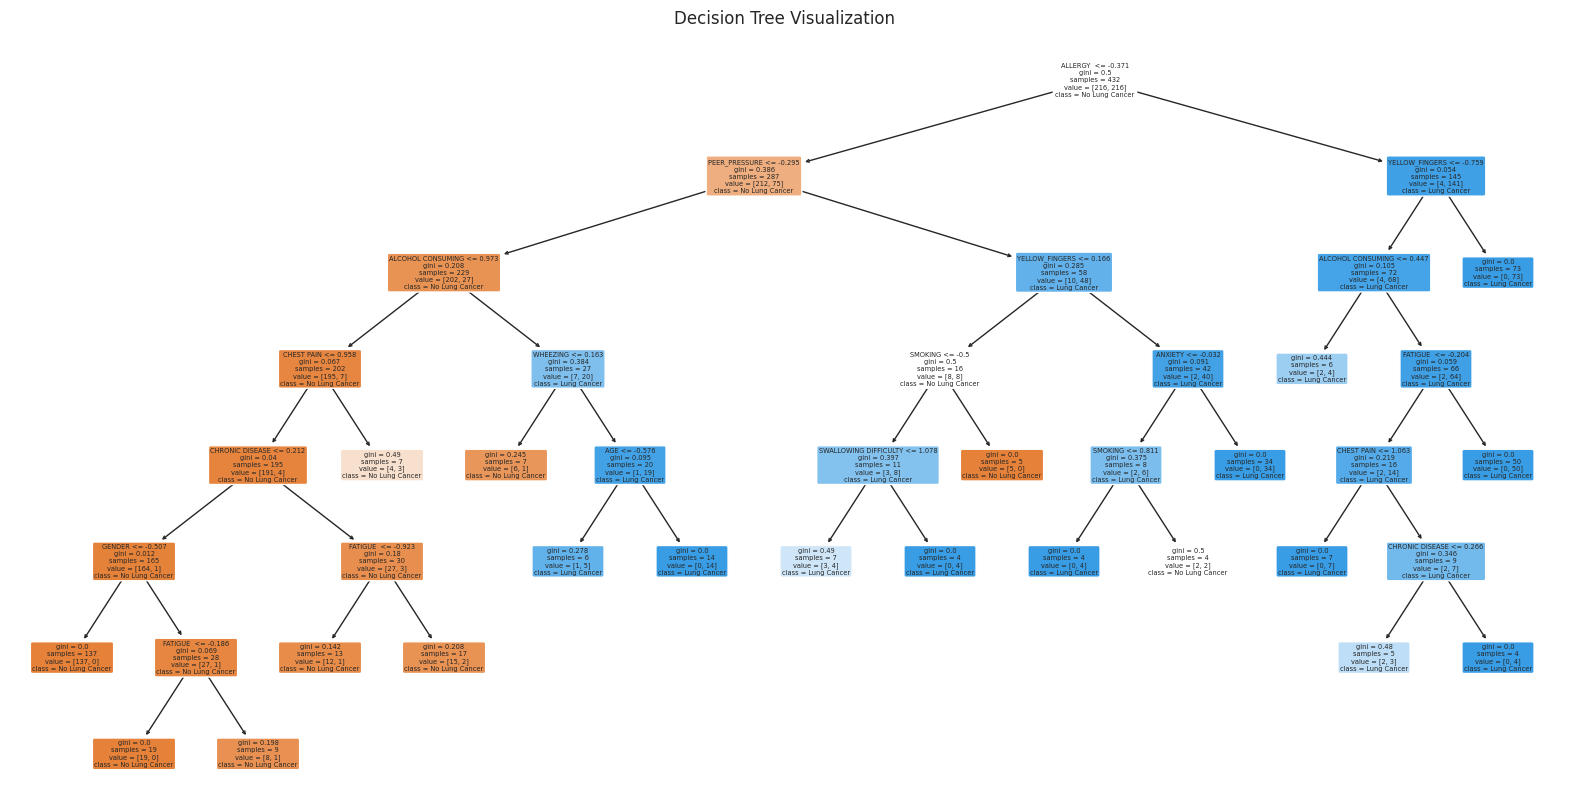

In [44]:
from sklearn.tree import plot_tree
# Create a new figure to plot the Decision Tree with a specified size for better visibility.
plt.figure(figsize=(20, 10))# Set the figure size to be large enough to display the tree clearly.
# Plot the Decision Tree using the plot_tree function.
# - 'best_dt': The trained Decision Tree model to visualize.
# - 'feature_names': The names of the features used in the model (from the original DataFrame).
# - 'class_names': The names of the target classes ('No Lung Cancer' and 'Lung Cancer'), which will be displayed at the leaf nodes.
# - 'filled': Fill the nodes with colors that represent the majority class in each node.
# - 'rounded': Use rounded corners for the nodes for better aesthetics.
plot_tree(best_dt, feature_names=X.columns, class_names=['No Lung Cancer', 'Lung Cancer'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')# Set the title of the plot.
plt.show()#Display the plot

# **Naive Bayes Model **

Accuracy (Untuned Naive Bayes): 0.8548
Precision (Untuned Naive Bayes): 0.8947
Recall (Untuned Naive Bayes): 0.9444
F1 Score (Untuned Naive Bayes): 0.9189
ROC AUC (Untuned Naive Bayes): 0.8819
Classification Report (Untuned Naive Bayes):
              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.89      0.94      0.92        54

    accuracy                           0.85        62
   macro avg       0.65      0.60      0.61        62
weighted avg       0.83      0.85      0.84        62

Confusion Matrix (Untuned Naive Bayes):
[[ 2  6]
 [ 3 51]]


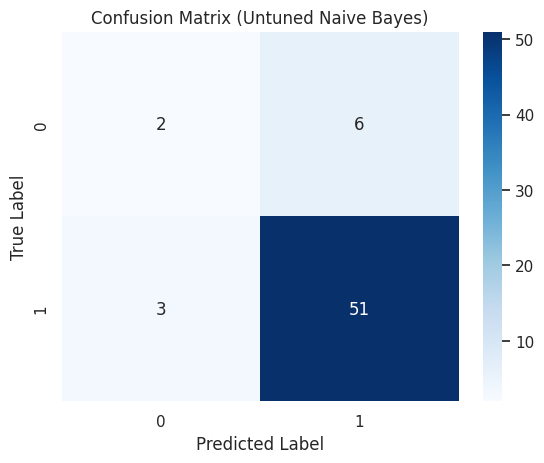

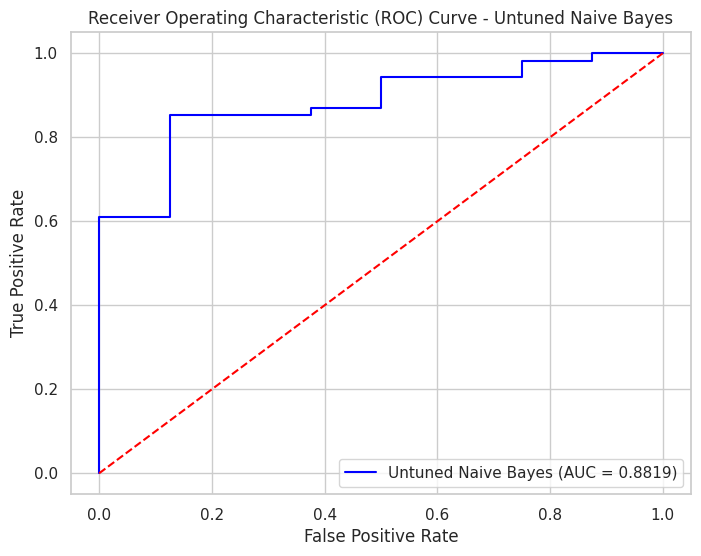

In [45]:
# Initialize the Naive Bayes model with default parameters.
# GaussianNB is used here, which is suitable for continuous features and assumes that they follow a Gaussian distribution.
untuned_nb = GaussianNB()

# Train the untuned Naive Bayes model on the SMOTE-resampled and scaled training data.
untuned_nb.fit(X_train_smote_scaled, y_train_smote)

# Predict the labels for the test set using the trained untuned Naive Bayes model.
y_pred_untuned_nb = untuned_nb.predict(X_test_scaled)

# Predict the probabilities for the test set, specifically for the positive class, using the untuned Naive Bayes model.
# These probabilities are necessary for calculating the ROC AUC.
y_probs_untuned_nb = untuned_nb.predict_proba(X_test_scaled)[:, 1]

# Calculate key performance metrics:
# - Accuracy: The proportion of correctly classified instances out of the total instances.
# - Precision: The proportion of true positive predictions out of all positive predictions made by the model.
# - Recall: The proportion of true positive predictions out of all actual positive instances.
# - F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
# - ROC AUC: The Area Under the ROC Curve, summarizing the model's ability to distinguish between classes.
accuracy_untuned_nb = accuracy_score(y_test, y_pred_untuned_nb)
precision_untuned_nb = precision_score(y_test, y_pred_untuned_nb)
recall_untuned_nb = recall_score(y_test, y_pred_untuned_nb)
f1_untuned_nb = f1_score(y_test, y_pred_untuned_nb)
roc_auc_untuned_nb = roc_auc_score(y_test, y_probs_untuned_nb)

# Display the calculated metrics with four decimal points for precision.
print(f"Accuracy (Untuned Naive Bayes): {accuracy_untuned_nb:.4f}")
print(f"Precision (Untuned Naive Bayes): {precision_untuned_nb:.4f}")
print(f"Recall (Untuned Naive Bayes): {recall_untuned_nb:.4f}")
print(f"F1 Score (Untuned Naive Bayes): {f1_untuned_nb:.4f}")
print(f"ROC AUC (Untuned Naive Bayes): {roc_auc_untuned_nb:.4f}")

# Generate and display a classification report for the untuned Naive Bayes model.
# The classification report includes precision, recall, F1-score, and support for each class.
print("Classification Report (Untuned Naive Bayes):")
print(classification_report(y_test, y_pred_untuned_nb))

# Generate and display the confusion matrix to visualize the untuned Naive Bayes model's performance.
# The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions.
conf_matrix_untuned_nb = confusion_matrix(y_test, y_pred_untuned_nb)
print("Confusion Matrix (Untuned Naive Bayes):")
print(conf_matrix_untuned_nb)

# Plot the confusion matrix using a heatmap for better visualization.
# The annot=True argument adds the actual numbers on the heatmap cells.
# The fmt='d' argument ensures that the numbers are displayed as integers.
# The cmap='Blues' argument sets the color scheme of the heatmap to shades of blue.
sns.heatmap(conf_matrix_untuned_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Untuned Naive Bayes)') # Set the title of the plot.
plt.xlabel('Predicted Label')# Label the x-axis.
plt.ylabel('True Label')# Label the y-axis.
plt.show()# Display the plot.

# Plot the ROC Curve for the Untuned Naive Bayes model to visualize the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR).
fpr_untuned_nb, tpr_untuned_nb, _ = roc_curve(y_test, y_probs_untuned_nb)
plt.figure(figsize=(8, 6))# Plot the ROC curve with the AUC in the legend.
plt.plot(fpr_untuned_nb, tpr_untuned_nb, color='blue', label=f'Untuned Naive Bayes (AUC = {roc_auc_untuned_nb:.4f})')# Plot the ROC curve with the AUC in the legend.
plt.plot([0, 1], [0, 1], color='red', linestyle='--')# Plot the diagonal reference line, representing a random classifier.
plt.title('Receiver Operating Characteristic (ROC) Curve - Untuned Naive Bayes')# Set the title of the plot.
plt.xlabel('False Positive Rate') # Label the x-axis.
plt.ylabel('True Positive Rate') # Label the y-axis.
plt.legend(loc='lower right')# Position the legend in the lower right corner of the plot.
plt.show()#Display

In [46]:
# Define the parameter grid for hyperparameter tuning of the Gaussian Naive Bayes model.
# The parameter grid includes different values for 'var_smoothing', which is a smoothing parameter applied to the variance of each feature.
# - 'var_smoothing': This parameter helps to stabilize calculations when features have very small variances, preventing division by zero.
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03]
}

# Initialize the Gaussian Naive Bayes model with default parameters.
naive_bayes = GaussianNB()

# Initialize GridSearchCV to perform hyperparameter tuning using 5-fold cross-validation.
# - 'estimator': The model to tune (Gaussian Naive Bayes in this case).
# - 'param_grid': The grid of parameters to search over.
# - 'cv': The number of cross-validation folds (5-fold in this case).
# - 'scoring': The metric to evaluate model performance ('accuracy' in this case).
# - 'n_jobs': The number of CPU cores to use (-1 uses all available cores).
# - 'verbose': Controls the verbosity; the higher the number, the more detailed the output (1 provides basic progress information).
grid_search_nb = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the resampled and scaled training data.
# This will train the Gaussian Naive Bayes model for each value of 'var_smoothing' in the parameter grid and evaluate it using cross-validation
grid_search_nb.fit(X_train_smote_scaled, y_train_smote)

# Retrieve the best set of hyperparameters found by GridSearchCV.
# This provides the value of 'var_smoothing' that resulted in the highest accuracy during cross-validation.
best_params_nb = grid_search_nb.best_params_
print(f"Best hyperparameters for GaussianNB: {best_params_nb}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best hyperparameters for GaussianNB: {'var_smoothing': 1e-09}


Accuracy (Naive Bayes): 0.8548
Precision (Naive Bayes): 0.8947
Recall (Naive Bayes): 0.9444
F1 Score (Naive Bayes): 0.9189
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.89      0.94      0.92        54

    accuracy                           0.85        62
   macro avg       0.65      0.60      0.61        62
weighted avg       0.83      0.85      0.84        62

Confusion Matrix (Naive Bayes):
[[ 2  6]
 [ 3 51]]


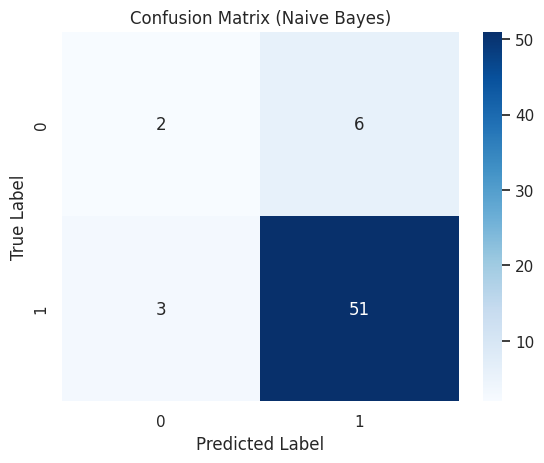

In [47]:
# Train the best Gaussian Naive Bayes model using the best hyperparameters found by GridSearchCV.
# The best_estimator_ attribute gives the model with the optimal 'var_smoothing' parameter identified during the grid search.
best_nb = grid_search_nb.best_estimator_

# Fit the best Gaussian Naive Bayes model on the resampled and scaled training data.
best_nb.fit(X_train_smote_scaled, y_train_smote)

# Predict the labels for the test set using the trained Gaussian Naive Bayes model.
y_pred_nb = best_nb.predict(X_test_scaled)

# Calculate key performance metrics:
# - Accuracy: The proportion of correctly classified instances out of the total instances.
# - Precision: The proportion of true positive predictions out of all positive predictions made by the model.
# - Recall: The proportion of true positive predictions out of all actual positive instances.
# - F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Display the calculated metrics with four decimal points for precision.
print(f"Accuracy (Naive Bayes): {accuracy_nb:.4f}")
print(f"Precision (Naive Bayes): {precision_nb:.4f}")
print(f"Recall (Naive Bayes): {recall_nb:.4f}")
print(f"F1 Score (Naive Bayes): {f1_nb:.4f}")

# Generate and display a classification report for the Gaussian Naive Bayes model.
# The classification report includes precision, recall, F1-score, and support for each class.
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

# Generate and display the confusion matrix to visualize the Gaussian Naive Bayes model's performance.
# The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions.
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)

# Plot the confusion matrix using a heatmap for better visualization.
# The annot=True argument adds the actual numbers on the heatmap cells.
# The fmt='d' argument ensures that the numbers are displayed as integers.
# The cmap='Blues' argument sets the color scheme of the heatmap to shades of blue.
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Naive Bayes)')# Set the title of the plot.
plt.xlabel('Predicted Label')# Label the x-axis.
plt.ylabel('True Label')# Label the y-axis.
plt.show()#Display

ROC AUC (Naive Bayes): 0.8819


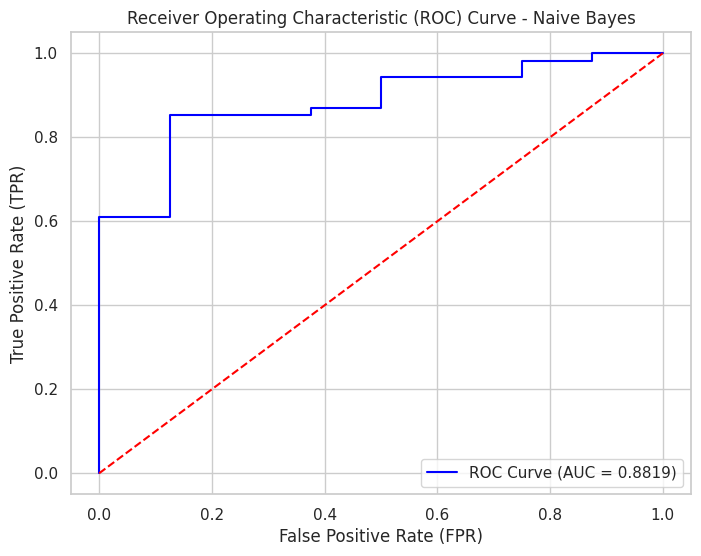

In [48]:
# Predict probabilities for the test set
# The predict_proba method returns the probability estimates for all classes.
# Here, we are interested only in the probability of the positive class (class 1),
# which is why we use [:, 1] to extract those probabilities.
y_probs_nb = best_nb.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class

# Compute the ROC curve
# The roc_curve function computes the false positive rate (FPR), true positive rate (TPR),
# and the corresponding thresholds for different classification thresholds.
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb)

# Calculate the AUC (Area Under the Curve)
# The roc_auc_score function calculates the area under the ROC curve,
# which gives a single scalar value representing the model's ability to distinguish between classes.
roc_auc_nb = roc_auc_score(y_test, y_probs_nb)
# Print the AUC value with four decimal places
print(f"ROC AUC (Naive Bayes): {roc_auc_nb:.4f}")
# Create a new figure with a specified size
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', label=f'ROC Curve (AUC = {roc_auc_nb:.4f})')# Plot the ROC curve using FPR and TPR, with the AUC value displayed in the legend
# Plot a diagonal line representing a random classifier (no discrimination ability)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Plotting the diagonal line
# Set the title and labels for the plot
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')# Add a legend in the lower right corner of the plot
plt.show()

                  Feature  Importance
8                ALLERGY    16.478575
10      ALCOHOL CONSUMING    6.249320
5           PEER_PRESSURE    5.051899
13  SWALLOWING DIFFICULTY    4.461147
14             CHEST PAIN    3.677892
9                WHEEZING    3.425288
11               COUGHING    2.444991
3          YELLOW_FINGERS    1.827114
6         CHRONIC DISEASE    1.470202
4                 ANXIETY    1.458499
0                  GENDER    1.053433
7                FATIGUE     0.774999
2                 SMOKING    0.535321
12    SHORTNESS OF BREATH    0.460835
1                     AGE    0.260160


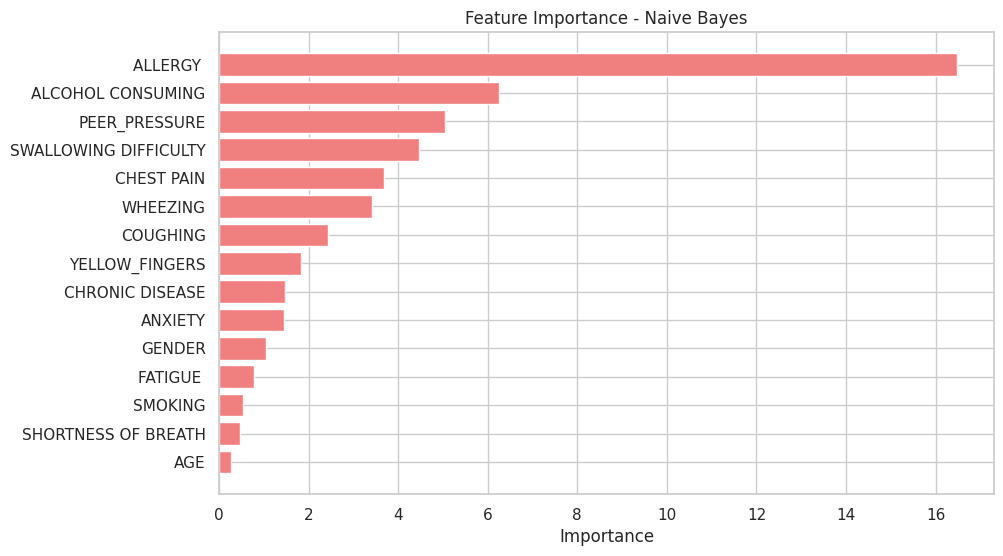

In [49]:
# Fit the Naive Bayes model to the training data
# This step trains the Naive Bayes model using the scaled and SMOTE-balanced training dataset.
# After fitting, the model will have learned the mean and variance of the features for each class.
best_nb.fit(X_train_smote_scaled, y_train_smote)

# Calculate the feature importance
# Feature importance is calculated as the absolute difference between the means of each feature
# for the two classes, divided by the variance of the features for class 0.
# This gives a measure of how important each feature is in distinguishing between the classes.
importance = np.abs(best_nb.theta_[0] - best_nb.theta_[1]) / best_nb.var_[0]

# Get the feature names
# Here, we retrieve the names of the features from the original dataset.
feature_names = X.columns

# Create a DataFrame to display feature importance
# This DataFrame will hold the feature names and their corresponding importance scores,
# making it easier to interpret and visualize.
importance_df_nb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Sort the DataFrame by importance
# Sorting the DataFrame ensures that the most important features appear at the top,
# which is helpful for both interpretation and visualization.
importance_df_nb = importance_df_nb.sort_values(by='Importance', ascending=False)

# Display the feature importance
# Printing the DataFrame allows us to see the calculated importance of each feature,
# sorted from most to least important.
print(importance_df_nb)

# Plotting the feature importance
plt.figure(figsize=(10, 6))# Create a new figure with a specified size
# Create a horizontal bar plot where the feature names are on the y-axis
# and their importance scores are on the x-axis.

plt.barh(importance_df_nb['Feature'], importance_df_nb['Importance'], color='lightcoral')
plt.xlabel('Importance')# Label the x-axis and set the title of the plot
plt.title('Feature Importance - Naive Bayes')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
# This makes the plot easier to read, as the most important features will be at the top of the plot.
plt.show()#Display the plot

# **3. Model Comparision**

In [50]:
# Fit the model on the training data
# This step trains the provided model using the scaled and SMOTE-balanced training data.
def evaluate_model(model, X_train_smote_scaled, y_train_smote, X_test_scaled, y_test):
     # Predict on the test set
    # The model predicts the class labels for the test data.
    model.fit(X_train, y_train)

    # Predict probabilities for the test set (for ROC AUC)
    # This step calculates the predicted probabilities for the positive class (class 1),
    # which are needed to compute the ROC AUC score.
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]  # For ROC AUC

    # Calculate evaluation metrics
    # Various evaluation metrics are calculated to assess the performance of the model:
    accuracy = accuracy_score(y_test, y_pred)# Accuracy: the proportion of correct predictions.
    precision = precision_score(y_test, y_pred)# Precision: the proportion of true positive predictions among all positive predictions.
    recall = recall_score(y_test, y_pred)# Recall: the proportion of true positive predictions among all actual positives.
    f1 = f1_score(y_test, y_pred)# F1 Score: the harmonic mean of precision and recall.
    roc_auc = roc_auc_score(y_test, y_probs)# ROC AUC: the area under the ROC curve, which measures the model's ability to distinguish between classes.

    # Return the calculated metrics as a dictionary
    # The function returns a dictionary containing all the computed metrics,
    # making it easy to access and compare different aspects of the model's performance.
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

In [51]:
# Initialize models with best parameters from tuning
# This dictionary stores the different models, each initialized with the optimal parameters
# found during the hyperparameter tuning process. These models are now ready to be evaluated
# on the test data.
models = {
    'Logistic Regression': best_logreg,# Logistic Regression model with the best parameters
    'SVM': best_svm,# Support Vector Machine model with the best parameters
    'Decision Tree': best_dt, # Decision Tree model with the best parameters
    'Naive Bayes': best_nb # Naive Bayes model with the best parameters
}

# Evaluate each model and store the results
# This dictionary will hold the evaluation results
# for each model. As the models are evaluated, their performance metrics will be added to this
# dictionary for easy comparison.
results = {}

# Loop through each model in the models dictionary
# The loop iterates over the models dictionary, where each key-value pair consists of the model's name
# and the corresponding model object. This allows us to evaluate multiple models in a systematic way.
for name, model in models.items():
    print(f"Evaluating {name}...")# Print the name of the model being evaluated
    # Evaluate the model using the evaluate_model function
    # The function returns a dictionary of performance metrics (e.g., accuracy, precision, recall, F1 score, ROC AUC)
    # which are then stored in the results dictionary with the model's name as the key.
    results[name] = evaluate_model(model, X_train_smote_scaled, y_train_smote, X_test_scaled, y_test)
# Convert the results dictionary to a DataFrame for easy comparison

results_df = pd.DataFrame(results).T
print(results_df)

Evaluating Logistic Regression...
Evaluating SVM...
Evaluating Decision Tree...
Evaluating Naive Bayes...
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.870968   0.870968  1.000000  0.931034  0.759259
SVM                  0.903226   0.944444  0.944444  0.944444  0.949074
Decision Tree        0.854839   0.924528  0.907407  0.915888  0.894676
Naive Bayes          0.854839   0.924528  0.907407  0.915888  0.918981


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


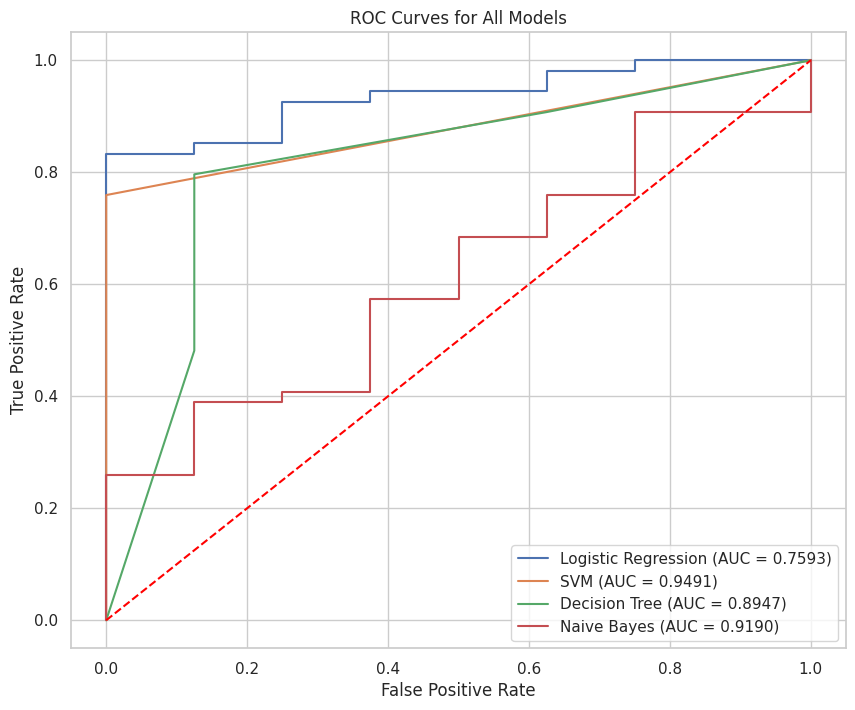

In [52]:
# Create a new figure for plotting the ROC curves
plt.figure(figsize=(10, 8))# Set the size of the figure to 10x8 inches
# Loop through each model in the models dictionary
# For each model, calculate the ROC curve and plot it
for name, model in models.items():
  # Predict probabilities for the positive class (class 1) on the test set
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    # Compute the ROC curve using the true labels and predicted probabilities
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    # Plot the ROC curve for the current model
    # The label includes the model's name and its corresponding ROC AUC score (formatted to four decimal places)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["ROC AUC"]:.4f})')
# Plot a diagonal line representing the performance of a random classifier (FPR equals TPR)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curves for All Models')# Add title and labels to the plot
plt.xlabel('False Positive Rate')# Label for the x-axis
plt.ylabel('True Positive Rate')# Label for the y-axis
plt.legend(loc='lower right')# Add a legend in the lower right corner to identify the curves for each model
plt.show()#Display

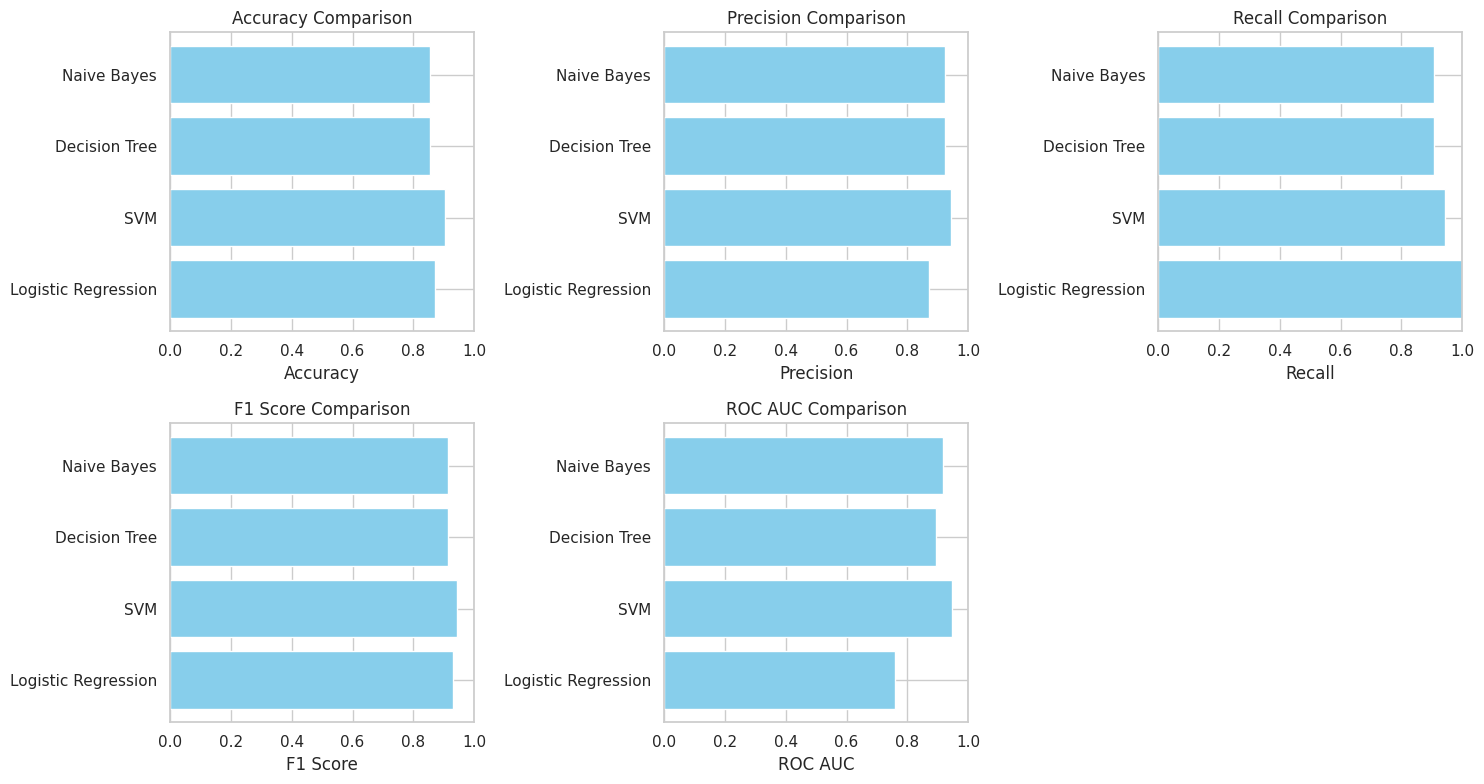

In [53]:
# Create a bar plot for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
# Reorder the columns in the results DataFrame to ensure they match the order in the metrics list
results_df = results_df[metrics]  #  This ensures that the DataFrame columns are in the correct order for plotting

# Set the figure size
plt.figure(figsize=(15, 8))# The figure size is set to 15x8 inches to accommodate multiple subplots

# Plotting the bar plot for each metric
# The loop iterates over the list of metrics, creating a subplot for each one
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)# Create a 2x3 grid of subplots and select the i-th subplot
    plt.barh(results_df.index, results_df[metric], color='skyblue')# Create a horizontal bar plot for the current metric
    plt.title(f'{metric} Comparison')# Set the title of the subplot to the current metric name
    plt.xlabel(metric) # Label the x-axis with the name of the current metric
    plt.xlim(0, 1) # Set the x-axis limits to be between 0 and 1 for all subplots for consistency
# Adjust layout to prevent overlap between subplots
plt.tight_layout()# This adjusts the padding between subplots to ensure they fit nicely within the figure
plt.show()#Display

<Figure size 1500x800 with 0 Axes>

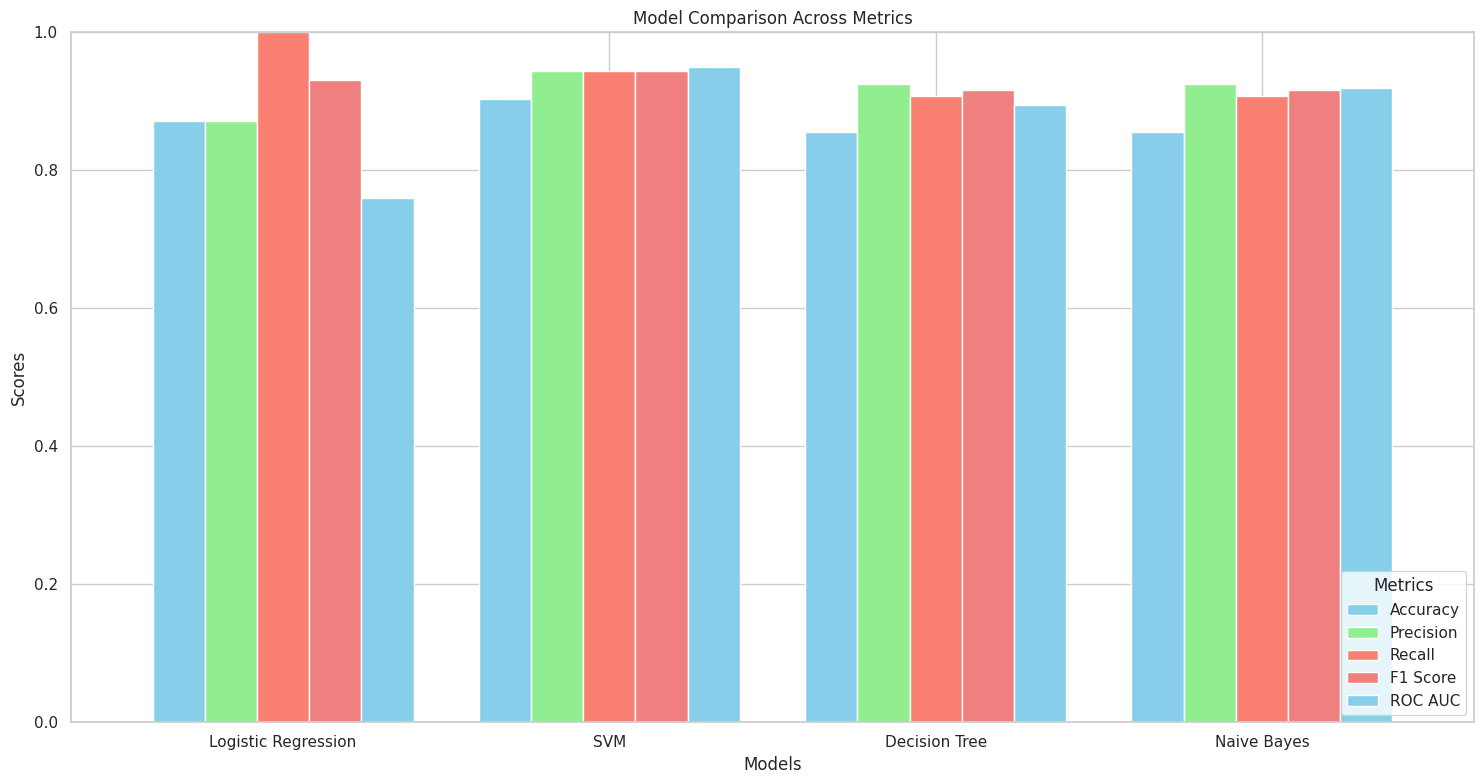

In [54]:
# Set the figure size
plt.figure(figsize=(15, 8))# The figure size is set to 15x8 inches, which provides ample space for the bar plot


# Plotting the bar plot using the DataFrame's built-in plotting method
# The plot method is set to 'bar', and we're specifying the size, bar width, and colors for each metric.
# Each color corresponds to a different metric, helping to distinguish them visually.
results_df.plot(kind='bar', figsize=(15, 8), width=0.8, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])

# Customize the plot
plt.title('Model Comparison Across Metrics')# Set the title of the plot for clear context
plt.xlabel('Models')# Label the x-axis as 'Models', indicating that each group of bars represents a different model
plt.ylabel('Scores')# Label the y-axis as 'Scores', which refers to the metric values being compared
plt.ylim(0, 1) # Set the y-axis limits to range from 0 to 1 for all metrics, providing a consistent scale
plt.xticks(rotation=0)# Rotate x-axis labels to 0 degrees, keeping them horizontal for better readability
plt.legend(title='Metrics', loc='lower right')# Add a legend with a title 'Metrics' positioned in the lower right corner
plt.tight_layout()# Adjust layout to ensure that all elements fit well within the figure, reducing overlap

# Show the plot
plt.show()

In [55]:

# Initialize a dictionary to store feature importance for each model
# This dictionary will store the feature importance scores for each model,
# with the model names as keys and their respective feature importance values as entries.
feature_importances = {}

# Logistic Regression
# For Logistic Regression, feature importance is typically derived from the absolute values of the model coefficients.
# The coefficients indicate the direction and magnitude of the relationship between the features and the target variable.
logreg_importance = np.abs(best_logreg.coef_[0])  # Absolute value of coefficients
feature_importances['Logistic Regression'] = logreg_importance

# SVM (only applicable if the kernel is linear)
# Feature importance in SVM is available when using a linear kernel, and it can be derived from the absolute values of the coefficients.
if 'linear' in best_svm.kernel:  # Check if the SVM model uses a linear kernel
    svm_importance = np.abs(best_svm.coef_[0])# Absolute value of coefficients for SVM
    feature_importances['SVM'] = svm_importance# Store the importance scores in the dictionary
else:
  # Print a message indicating that feature importance is not available for non-linear kernels
    print("SVM feature importance is not available for non-linear kernels.")

# Decision Tree
# In Decision Trees, feature importance is directly available as an attribute of the fitted model.
# It reflects the importance of each feature in reducing impurity across the tree's nodes.ee
dt_importance = best_dt.feature_importances_# Feature importance from the Decision Tree model
feature_importances['Decision Tree'] = dt_importance# Store the importance scores in the dictionary

# Naive Bayes
# For Naive Bayes, feature importance can be calculated based on the difference between the mean feature values
# of the two classes, normalized by the variance of the features. This gives an indication of how different
# each feature is between the classes, which reflects its importance.
nb_importance = np.abs(best_nb.theta_[0] - best_nb.theta_[1]) / best_nb.var_[0]
feature_importances['Naive Bayes'] = nb_importance# Store the importance scores in the dictionary

# Convert feature importances to a DataFrame for easy comparison
# The dictionary of feature importances is converted into a DataFrame, where each column represents a model
# and each row corresponds to a feature. This structure makes it easier to compare the importance of each
# feature across different models.
importance_df = pd.DataFrame(feature_importances, index=X.columns)

# Normalize feature importances for better comparison (optional)
# Feature importances are normalized (scaled between 0 and 1) for each model to facilitate easier comparison
# across different models, as they may have different scales of importance scores.
importance_df = importance_df.apply(lambda x: x / np.max(x), axis=0)
# Print the DataFrame of feature importances to view the results
print(importance_df)

                       Logistic Regression       SVM  Decision Tree  \
GENDER                            0.132984  0.110436       0.000000   
AGE                               0.087992  0.000051       0.000000   
SMOKING                           0.010682  0.560062       0.106625   
YELLOW_FINGERS                    0.365624  0.613048       0.033230   
ANXIETY                           0.223182  0.255888       0.206268   
PEER_PRESSURE                     0.685509  0.857880       0.966878   
CHRONIC DISEASE                   0.479813  1.000000       0.216638   
FATIGUE                           0.448927  0.874616       0.254272   
ALLERGY                           1.000000  0.691168       1.000000   
WHEEZING                          0.524703  0.612060       0.000000   
ALCOHOL CONSUMING                 0.876101  0.774911       0.890129   
COUGHING                          0.605123  0.649333       0.000000   
SHORTNESS OF BREATH               0.003182  0.184362       0.022502   
SWALLO

In [ ]:
# Plotting the feature importance comparison
plt.figure(figsize=(15, 10))# Set the figure size to 15x10 inches, providing ample space for the plot
# Loop through each model in the DataFrame columns
# For each model, plot the normalized feature importance values as a line plot with markers.
# This allows for a visual comparison of how different models rank the importance of each feature.
for model in importance_df.columns:
    plt.plot(importance_df.index, importance_df[model], marker='o', label=model)
 # Plot the feature importances with feature names on the x-axis and their normalized importance on the y-axis
    # 'marker='o'' adds a circle marker at each data point to make the plot clearer.
plt.title('Feature Importance Comparison Across Models')# Add a title to the plot for context
plt.xlabel('Features') # Label the x-axis as 'Features'
plt.ylabel('Normalized Importance')# Label the y-axis as 'Normalized Importance'
plt.xticks(rotation=90)# Rotate x-axis labels by 90 degrees to prevent overlap and improve readability
plt.legend() # Add a legend to the plot to identify which line corresponds to which model
plt.tight_layout()# Adjust layout to ensure all elements fit well within the figure, reducing overlap
plt.show()# Display the plot with the feature importance comparisons across models

<Figure size 1500x800 with 0 Axes>

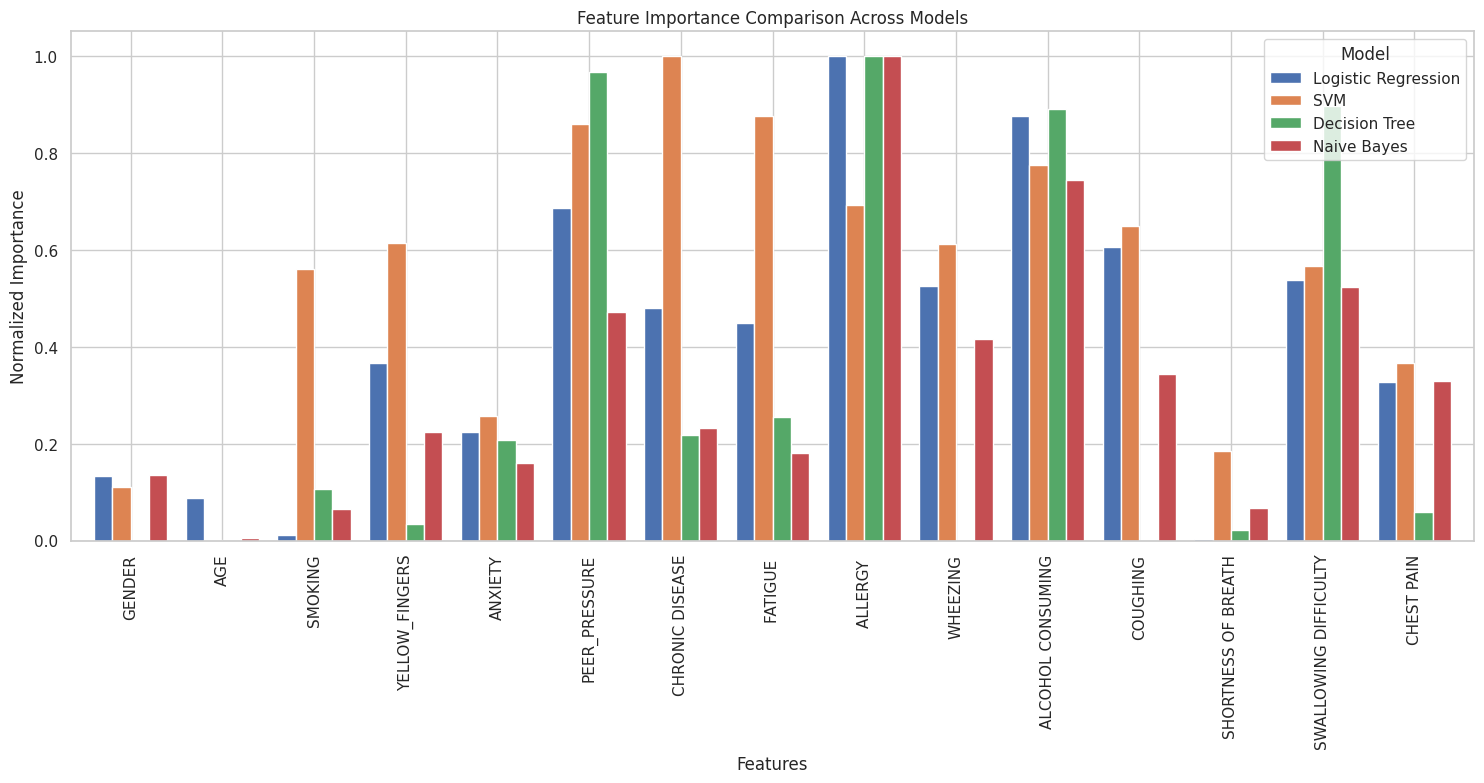

In [56]:
# Set the figure size
plt.figure(figsize=(15, 8))# The figure size is set to 15x8 inches to accommodate the bar plot

# Plotting the bar plot for each feature across all models
# The DataFrame's plot method is used to create a grouped bar plot, where each group corresponds to a feature,
# and each bar within the group represents the normalized importance of that feature according to a different model.
importance_df.plot(kind='bar', figsize=(15, 8), width=0.8)
# 'kind='bar'' specifies that we want a bar plot.
# 'width=0.8' adjusts the width of the bars to ensure they fit well within each group.
# Customize the plot
plt.title('Feature Importance Comparison Across Models')# Set the title of the plot for context
plt.xlabel('Features') # Label the x-axis as 'Features'
plt.ylabel('Normalized Importance')# Label the y-axis as 'Normalized Importance'
plt.xticks(rotation=90)# Rotate the x-axis labels by 90 degrees for better readability, especially if feature names are long
plt.legend(title='Model', loc='upper right')# Add a legend with the title 'Model' positioned in the upper right corner
plt.tight_layout()# This adjusts the layout to ensure that all plot elements fit nicely within the figure without overlapping

# Show the plot
plt.show() # Display the bar plot, which compares the normalized feature importance across different models
